In [1]:
import os

#current_directory = os.getcwd()
#print("Current Directory:", current_directory)


In [2]:
# Specify the path to the directory you want to change to
#new_directory = r'E:\UOC NOTES\4th year\ST 4052 - Statistical Learning\final\archive (1)'

# Change the working directory
#os.chdir(new_directory)

# Verify the change
#current_directory = os.getcwd()
#print("Current Directory:", current_directory)



In [3]:
import warnings
warnings.filterwarnings("ignore")

In [89]:
pip install adjustText


In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cross_decomposition import PLSRegression
from adjustText import adjust_text

# **Import data set**

In [5]:
#Loading 20 data sets
from google.colab import drive
drive.mount('/content/gdrive')

df1_1 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/vienna_weekends.csv')
df1_2 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/vienna_weekdays.csv')
df2_1 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/rome_weekends.csv')
df2_2 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/rome_weekdays.csv')
df3_1 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/paris_weekends.csv')
df3_2 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/paris_weekdays.csv')
df4_1 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/london_weekends.csv')
df4_2 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/london_weekdays.csv')
df5_1 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/lisbon_weekends.csv')
df5_2 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/lisbon_weekdays.csv')
df6_1 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/budapest_weekends.csv')
df6_2 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/budapest_weekdays.csv')
df7_1 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/berlin_weekends.csv')
df7_2 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/berlin_weekdays.csv')
df8_1 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/barcelona_weekends.csv')
df8_2 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/barcelona_weekdays.csv')
df9_1 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/athens_weekends.csv')
df9_2 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/athens_weekdays.csv')
df10_1 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/amsterdam_weekends.csv')
df10_2 = pd.read_csv('/content/gdrive/MyDrive/Data sets/ST4052_Final Project/amsterdam_weekdays.csv')

Mounted at /content/gdrive


# **Data Pre processing and feature engineering**

In [6]:
#Adding new variables "city = vienna" and "days = weekends"
df1_1['city'] = 'vienna'
df1_1['days'] = 'weekends'
#Adding new variables "city = vienna" and "days = weekdays"
df1_2['city'] = 'vienna'
df1_2['days'] = 'weekdays'
#Adding new variables "city = rome" and "days = weekends"
df2_1['city'] = 'rome'
df2_1['days'] = 'weekends'
#Adding new variables "city = rome" and "days = weekdays"
df2_2['city'] = 'rome'
df2_2['days'] = 'weekdays'
#Adding new variables "city = paris" and "days = weekends"
df3_1['city'] = 'paris'
df3_1['days'] = 'weekends'
#Adding new variables "city = paris" and "days = weekdays"
df3_2['city'] = 'paris'
df3_2['days'] = 'weekdays'
#Adding new variables "city = london" and "days = weekends"
df4_1['city'] = 'london'
df4_1['days'] = 'weekends'
#Adding new variables "city = london" and "days = weekdays"
df4_2['city'] = 'london'
df4_2['days'] = 'weekdays'
#Adding new variables "city = lisbon" and "days = weekends"
df5_1['city'] = 'lisbon'
df5_1['days'] = 'weekends'
#Adding new variables "city = lisbon" and "days = weekdays"
df5_2['city'] = 'lisbon'
df5_2['days'] = 'weekdays'
#Adding new variables "city = budapest" and "days = weekends"
df6_1['city'] = 'budapest'
df6_1['days'] = 'weekends'
#Adding new variables "city = budapest" and "days = weekdays"
df6_2['city'] = 'budapest'
df6_2['days'] = 'weekdays'
#Adding new variables "city = berlin" and "days = weekends"
df7_1['city'] = 'berlin'
df7_1['days'] = 'weekends'
#Adding new variables "city = berlin" and "days = weekdays"
df7_2['city'] = 'berlin'
df7_2['days'] = 'weekdays'
#Adding new variables "city = barcelona" and "days = weekends"
df8_1['city'] = 'barcelona'
df8_1['days'] = 'weekends'
#Adding new variables "city = barcelona" and "days = weekdays"
df8_2['city'] = 'barcelona'
df8_2['days'] = 'weekdays'
#Adding new variables "city = athens" and "days = weekends"
df9_1['city'] = 'athens'
df9_1['days'] = 'weekends'
#Adding new variables "city = athens" and "days = weekdays"
df9_2['city'] = 'athens'
df9_2['days'] = 'weekdays'
#Adding new variables "city = amsterdam" and "days = weekends"
df10_1['city'] = 'amsterdam'
df10_1['days'] = 'weekends'
#Adding new variables "city = amsterdam" and "days = weekdays"
df10_2['city'] = 'amsterdam'
df10_2['days'] = 'weekdays'

In [7]:
#combine all 20 data sets
df = pd.concat([df1_1,df1_2,df2_1,df2_2,df3_1,df3_2,df4_1,df4_2,df5_1,df5_2,df6_1,df6_2,df7_1,df7_2,df8_1,df8_2,df9_1,df9_2,df10_1,df10_2],axis =0)


In [8]:
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,days
0,0,324.661665,Entire home/apt,False,False,4.0,True,0,1,10.0,...,3.240613,0.610450,92.473467,6.622340,129.862880,3.138736,16.33006,48.20921,vienna,weekends
1,1,150.760816,Entire home/apt,False,False,2.0,True,0,1,10.0,...,2.241126,1.119505,124.258002,8.898538,154.350322,3.730588,16.38867,48.19104,vienna,weekends
2,2,196.339668,Entire home/apt,False,False,3.0,True,0,1,9.0,...,2.371551,0.452419,125.413127,8.981261,206.642494,4.994469,16.34236,48.20436,vienna,weekends
3,3,107.753079,Private room,False,True,2.0,False,0,0,8.0,...,3.629114,0.473164,62.459416,4.472931,93.810714,2.267369,16.37837,48.24102,vienna,weekends
4,4,196.339668,Entire home/apt,False,False,4.0,True,0,1,9.0,...,2.395063,0.443635,124.020359,8.881520,202.318070,4.889950,16.34198,48.20456,vienna,weekends


In [9]:
df.shape

(51707, 22)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51707 entries, 0 to 1102
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  float64
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  float64
 10  guest_satisfaction_overall  51707 non-null  float64
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  5170

In [11]:
df.describe()

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,1620.502388,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,1217.380366,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,0.000000,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,646.000000,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,1334.000000,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,2382.000000,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,5378.000000,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [12]:
df.isnull().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
days                          0
dtype: int64

In [13]:
(df.duplicated()).sum()

0

In [14]:
bedrooms_counts = df['bedrooms'].value_counts()
print(bedrooms_counts)

1     36333
2      9290
0      4485
3      1477
4        96
5        10
9        10
8         2
10        2
6         2
Name: bedrooms, dtype: int64


In [15]:
bedrooms_to_drop = [8, 10, 6]
df = df[~df['bedrooms'].isin(bedrooms_to_drop)]


In [16]:
bedrooms_counts = df['bedrooms'].value_counts()
print(bedrooms_counts)

1    36333
2     9290
0     4485
3     1477
4       96
5       10
9       10
Name: bedrooms, dtype: int64


In [17]:
rooms_type_counts = df['room_type'].value_counts()
print(rooms_type_counts)

Entire home/apt    32646
Private room       18689
Shared room          366
Name: room_type, dtype: int64


In [18]:
person_capacity_counts = df['person_capacity'].value_counts()
print(person_capacity_counts)

2.0    24329
4.0    14000
3.0     6165
6.0     4272
5.0     2935
Name: person_capacity, dtype: int64


In [19]:
cleanliness_ratingy_counts = df['cleanliness_rating'].value_counts()
print(cleanliness_ratingy_counts)

10.0    30065
9.0     15458
8.0      4348
7.0       947
6.0       501
4.0       143
2.0       143
5.0        86
3.0        10
Name: cleanliness_rating, dtype: int64


In [20]:
# Dropping columns
cols_drop = ["Unnamed: 0", "room_shared", "room_private","attr_index","rest_index","lat","lng"]
df = df.drop(cols_drop, axis=1, errors='ignore')


In [21]:
df.head()

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,city,days
0,324.661665,Entire home/apt,4.0,True,0,1,10.0,94.0,2,3.240613,0.610450,6.622340,3.138736,vienna,weekends
1,150.760816,Entire home/apt,2.0,True,0,1,10.0,96.0,1,2.241126,1.119505,8.898538,3.730588,vienna,weekends
2,196.339668,Entire home/apt,3.0,True,0,1,9.0,91.0,1,2.371551,0.452419,8.981261,4.994469,vienna,weekends
3,107.753079,Private room,2.0,False,0,0,8.0,92.0,1,3.629114,0.473164,4.472931,2.267369,vienna,weekends
4,196.339668,Entire home/apt,4.0,True,0,1,9.0,94.0,1,2.395063,0.443635,8.881520,4.889950,vienna,weekends


In [22]:
guest_satisfaction_overall_levels = df['guest_satisfaction_overall'].unique()
guest_satisfaction_overall_levels_sorted = sorted(guest_satisfaction_overall_levels)

print(guest_satisfaction_overall_levels_sorted)


[20.0, 30.0, 40.0, 44.0, 46.0, 47.0, 50.0, 53.0, 54.0, 55.0, 56.0, 57.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


In [23]:
guest_satisfaction_overall_counts = df['guest_satisfaction_overall'].value_counts()
print(guest_satisfaction_overall_counts)

100.0    10681
98.0      3889
97.0      3626
96.0      3532
93.0      3329
95.0      3299
94.0      2615
90.0      2605
99.0      2341
80.0      2055
92.0      2025
91.0      1799
88.0      1365
89.0      1309
87.0      1259
85.0       774
86.0       772
84.0       665
83.0       589
60.0       475
82.0       354
70.0       269
81.0       210
73.0       186
78.0       177
75.0       174
76.0       173
77.0       166
79.0       163
20.0       155
40.0       123
67.0       100
74.0        81
72.0        73
71.0        51
50.0        44
68.0        33
65.0        32
69.0        32
63.0        21
47.0        16
53.0        14
64.0        13
30.0         8
66.0         6
56.0         5
57.0         5
62.0         4
55.0         4
44.0         2
61.0         1
46.0         1
54.0         1
Name: guest_satisfaction_overall, dtype: int64


In [24]:
bins = [0, 59, 69, 79, 89, 100]  # Define the bin edges
labels = [1, 2, 3, 4, 5]  # Assign labels to each bin

df['recoded_guest_satisfaction'] = pd.cut(df['guest_satisfaction_overall'], bins=bins, labels=labels, include_lowest=True)

# Now 'recoded_satisfaction' contains the recoded values
print(df[['guest_satisfaction_overall', 'recoded_guest_satisfaction']])


      guest_satisfaction_overall recoded_guest_satisfaction
0                           94.0                          5
1                           96.0                          5
2                           91.0                          5
3                           92.0                          5
4                           94.0                          5
...                          ...                        ...
1098                       100.0                          5
1099                        90.0                          5
1100                        92.0                          5
1101                        84.0                          4
1102                        90.0                          5

[51701 rows x 2 columns]


In [25]:
df.drop("guest_satisfaction_overall",axis=1)

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,city,days,recoded_guest_satisfaction
0,324.661665,Entire home/apt,4.0,True,0,1,10.0,2,3.240613,0.610450,6.622340,3.138736,vienna,weekends,5
1,150.760816,Entire home/apt,2.0,True,0,1,10.0,1,2.241126,1.119505,8.898538,3.730588,vienna,weekends,5
2,196.339668,Entire home/apt,3.0,True,0,1,9.0,1,2.371551,0.452419,8.981261,4.994469,vienna,weekends,5
3,107.753079,Private room,2.0,False,0,0,8.0,1,3.629114,0.473164,4.472931,2.267369,vienna,weekends,5
4,196.339668,Entire home/apt,4.0,True,0,1,9.0,1,2.395063,0.443635,8.881520,4.889950,vienna,weekends,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.115342,Entire home/apt,2.0,False,0,0,10.0,1,2.375833,1.436054,9.594573,15.699521,amsterdam,weekdays,5
1099,233.637194,Private room,2.0,False,1,0,10.0,1,4.719736,0.322263,5.719989,9.391335,amsterdam,weekdays,5
1100,317.062311,Private room,2.0,False,1,0,10.0,1,0.598355,0.751993,23.323524,43.616927,amsterdam,weekdays,5
1101,1812.855904,Entire home/apt,4.0,False,0,0,8.0,5,1.943020,0.388532,13.658524,23.454022,amsterdam,weekdays,4


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51701 entries, 0 to 1102
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   realSum                     51701 non-null  float64 
 1   room_type                   51701 non-null  object  
 2   person_capacity             51701 non-null  float64 
 3   host_is_superhost           51701 non-null  bool    
 4   multi                       51701 non-null  int64   
 5   biz                         51701 non-null  int64   
 6   cleanliness_rating          51701 non-null  float64 
 7   guest_satisfaction_overall  51701 non-null  float64 
 8   bedrooms                    51701 non-null  int64   
 9   dist                        51701 non-null  float64 
 10  metro_dist                  51701 non-null  float64 
 11  attr_index_norm             51701 non-null  float64 
 12  rest_index_norm             51701 non-null  float64 
 13  city             

In [27]:
continuous_cols=["realSum","dist","metro_dist","attr_index_norm","rest_index_norm"]

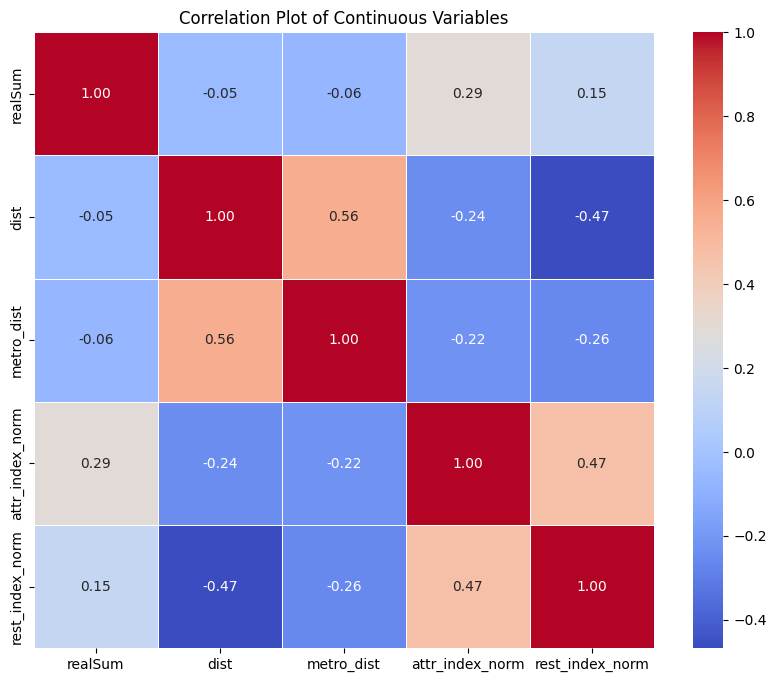

In [28]:
df_continuous = df[continuous_cols]

# Calculate the correlation matrix
corr_matrix = df_continuous.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Plot of Continuous Variables')
plt.show()


**Distributions of all variables**

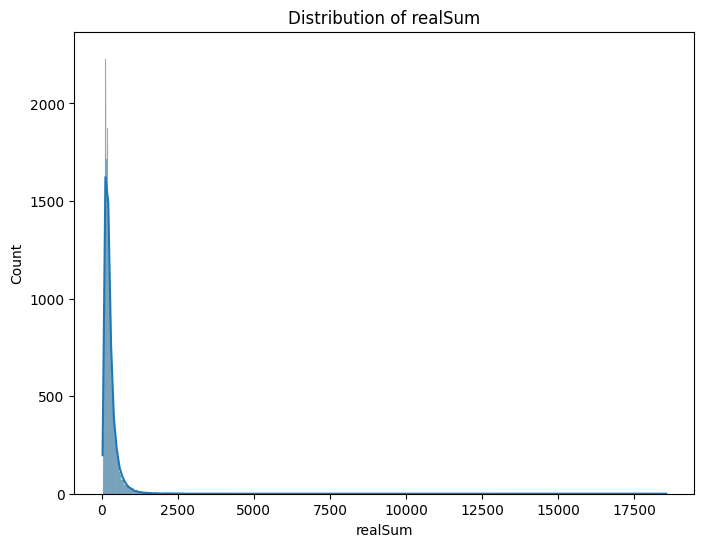

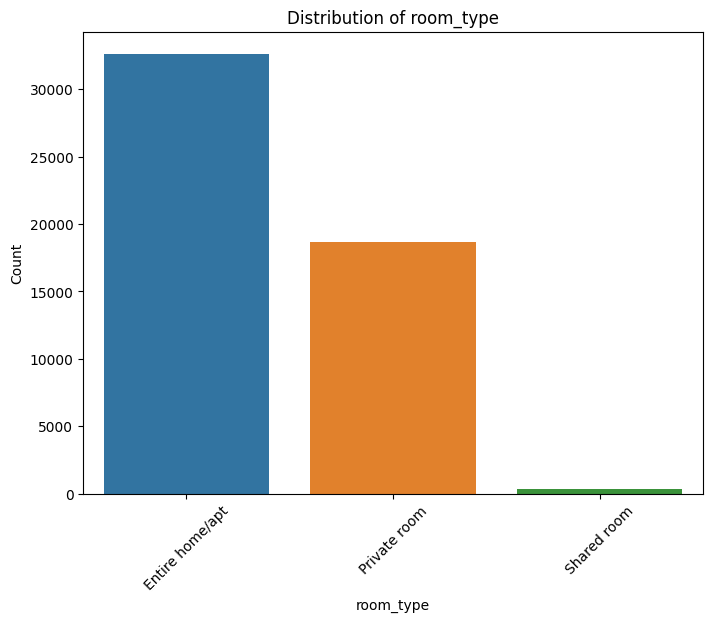

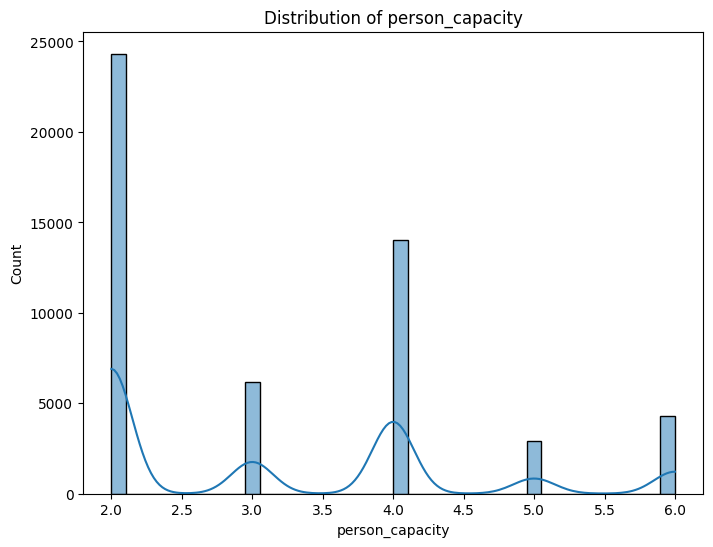

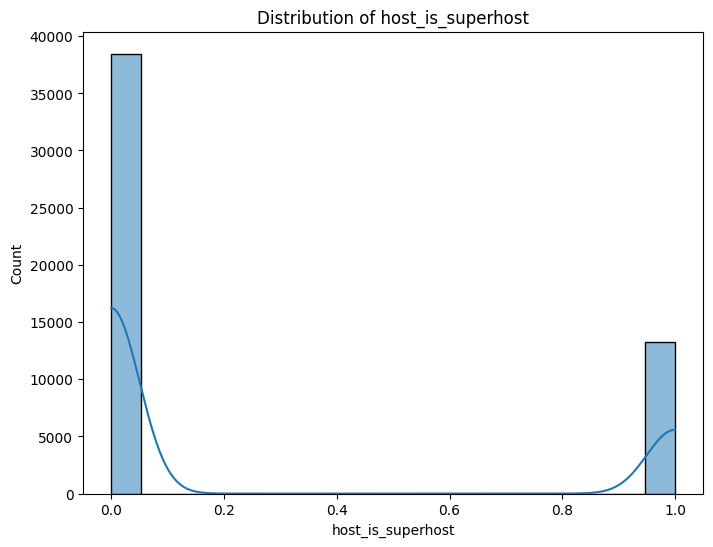

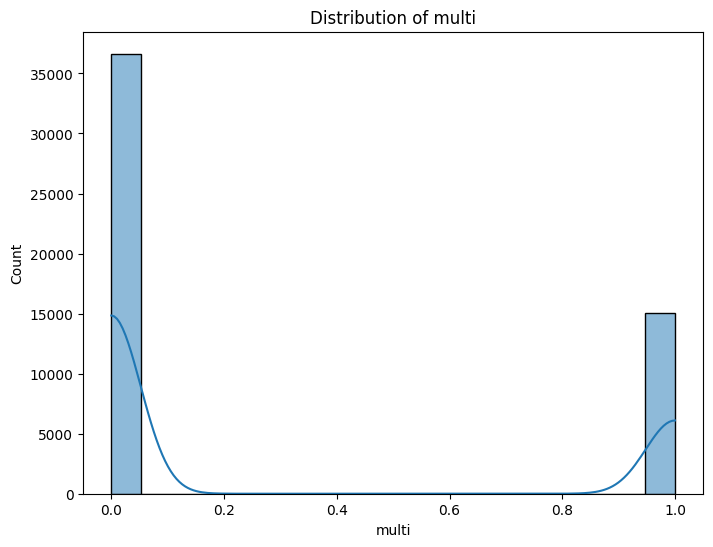

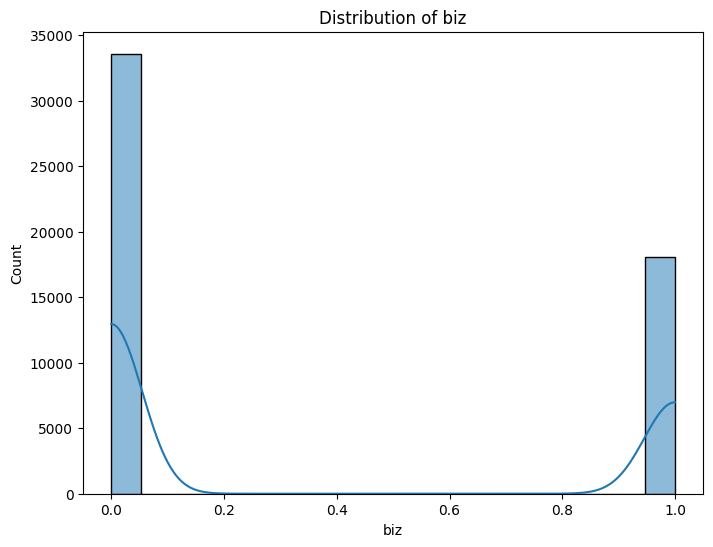

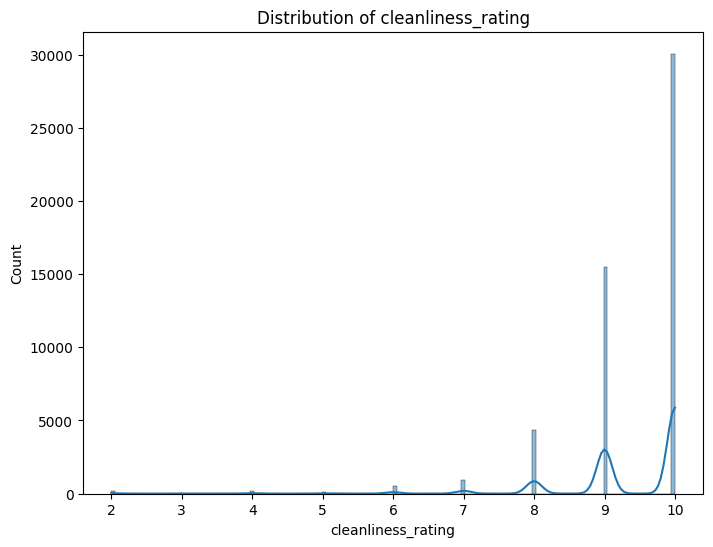

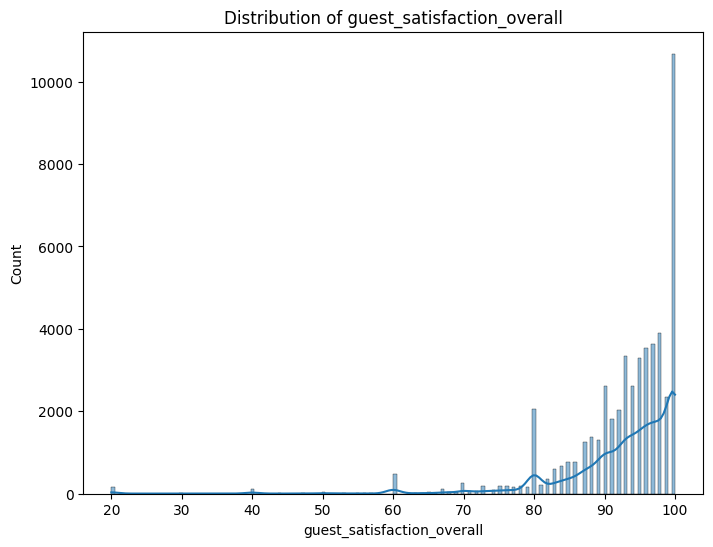

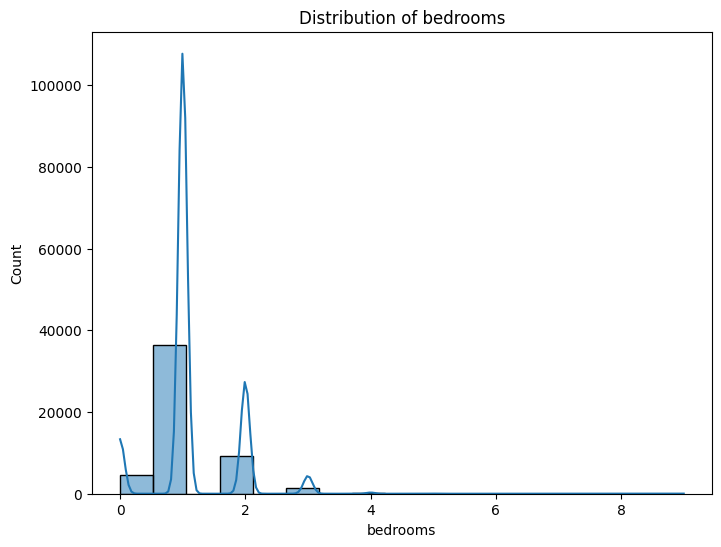

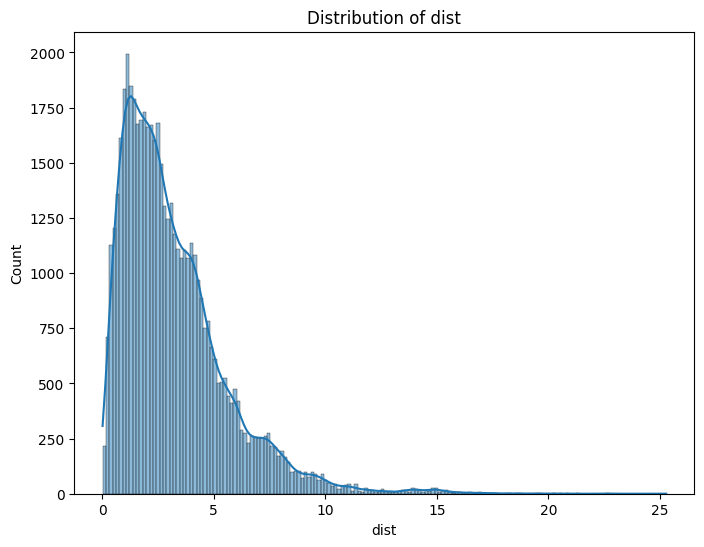

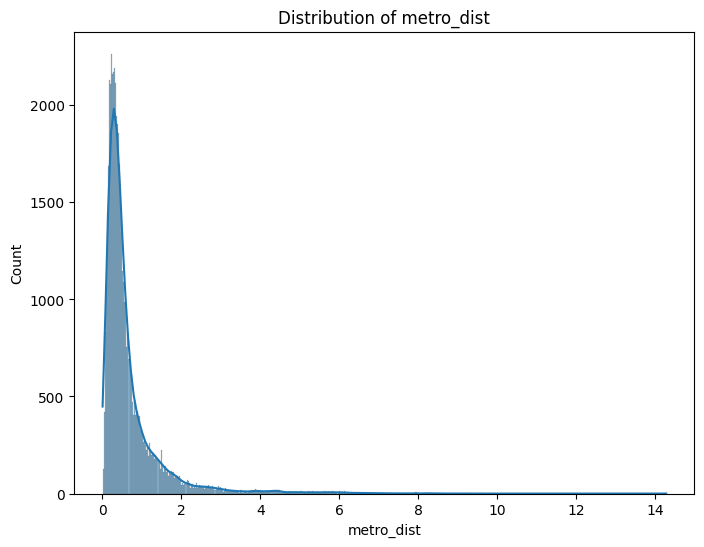

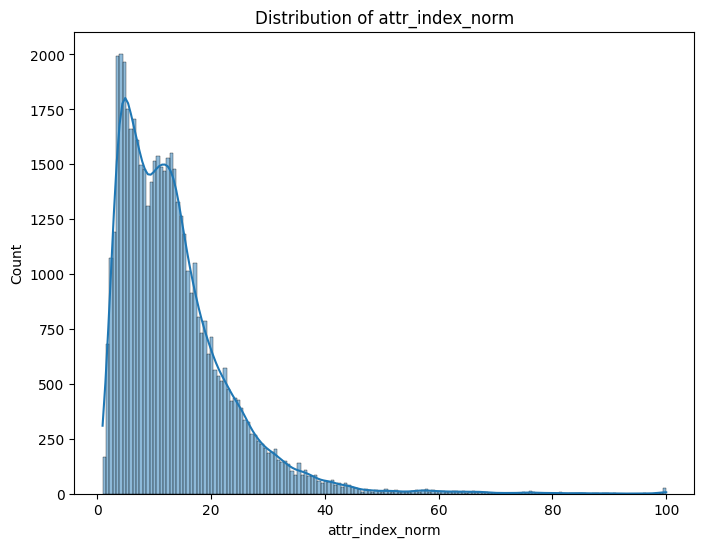

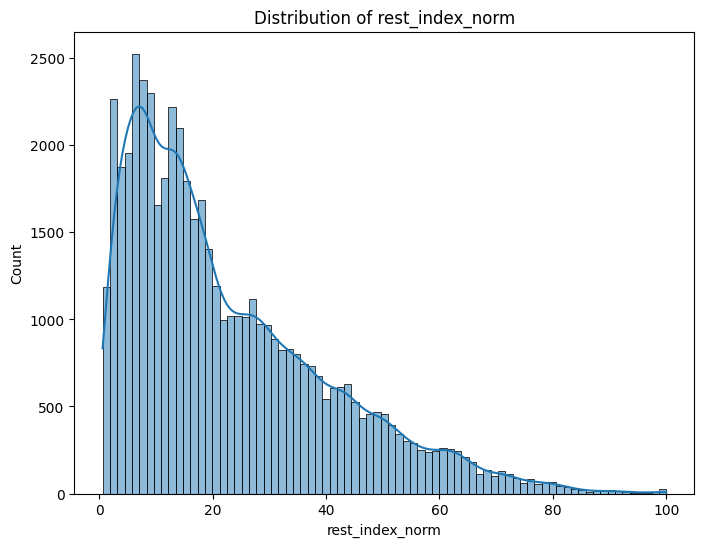

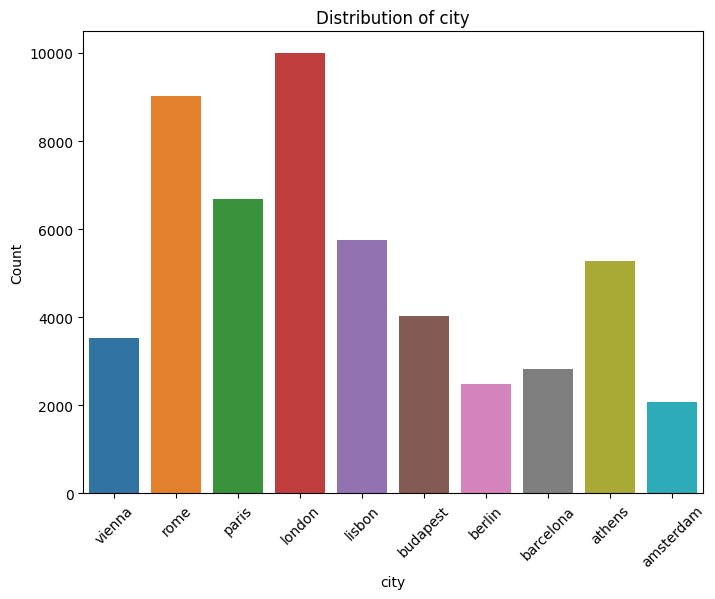

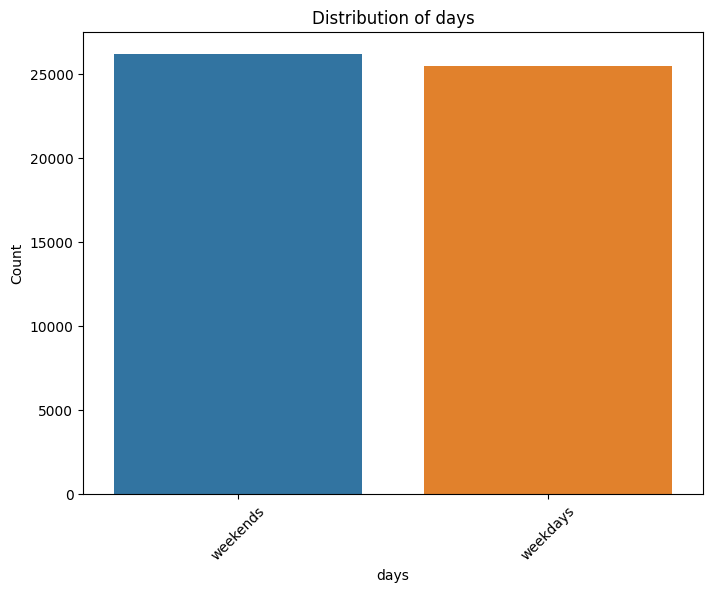

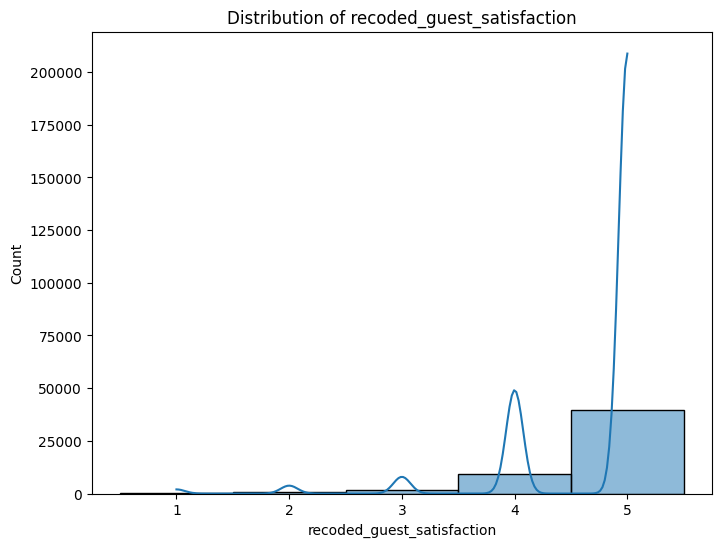

In [29]:
# Loop through each column in the DataFrame
for column in df.columns:
    plt.figure(figsize=(8, 6))  # Set the figure size

    # Check the data type of the column
    if df[column].dtype == 'object':
        # For categorical variables, create a countplot
        sns.countplot(x=column, data=df)
        plt.xticks(rotation=45)  # Rotate x-axis labels if needed

    else:
        # For continuous variables, create a distribution plot
        sns.histplot(df[column], kde=True)

    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# **Response variable (realSum)**

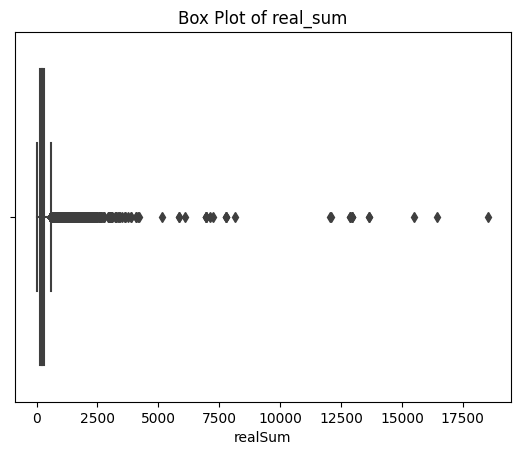

In [30]:
sns.boxplot(x=df['realSum'])
plt.title('Box Plot of real_sum')
plt.show()

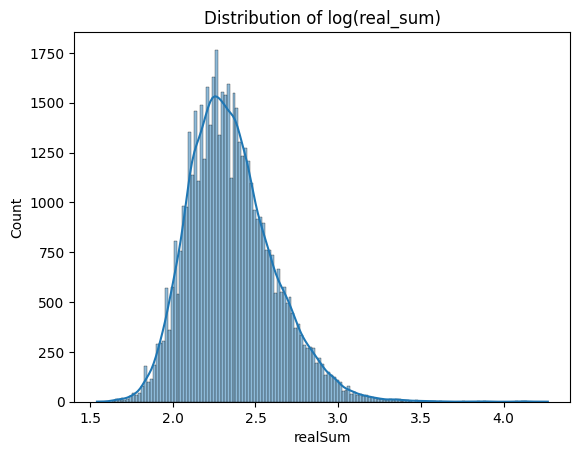

In [31]:
#transform the response variable (with outliers)
log_df1 = df.copy(deep=True)
log_df1['realSum'] = log_df1['realSum'].apply(lambda x : np.log10(x))

# Assuming 'real sum' is a numerical variable in your DataFrame
sns.histplot(log_df1['realSum'], kde=True)
plt.title('Distribution of log(real_sum)')
plt.show()

In [32]:
from scipy.stats import skew

# Assuming 'log_transformed_response' is the column you created
skewness = skew(log_df1['realSum'])
print(f'Skewness of log(realSum): {skewness}')

Skewness of log(realSum): 0.7056317157288383


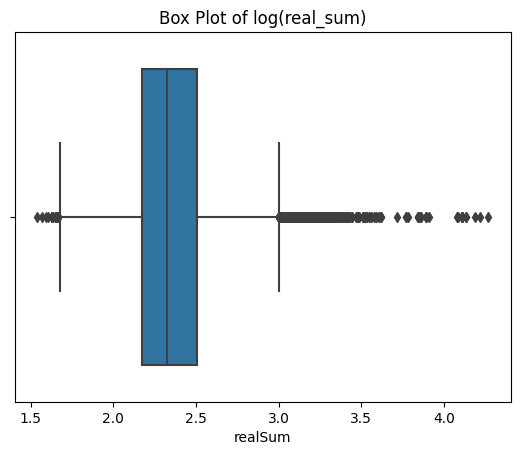

In [33]:
sns.boxplot(x=log_df1['realSum'])
plt.title('Box Plot of log(real_sum)')
plt.show()

# **Box cox Transformation of Response (realSum)**

In [34]:
pip install scipy

Optimal lambda value: -0.3466904275548227


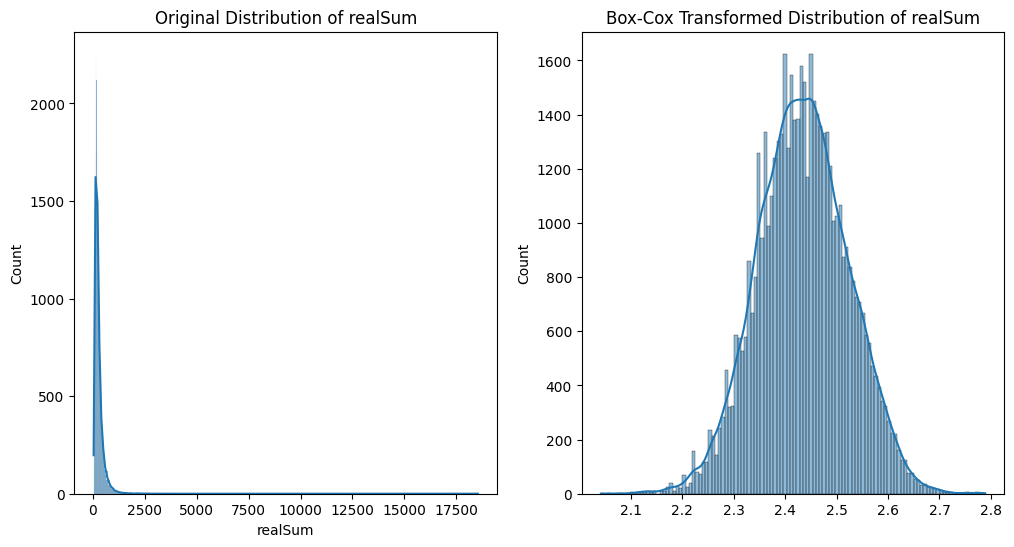

In [35]:
from scipy.stats import boxcox
# Extract the response variable
response_variable = df['realSum']

# Perform Box-Cox transformation
transformed_realSum, lambda_value = boxcox(response_variable)

# Update the response variable in the dataset with the transformed values
df['transformed_realSum'] = transformed_realSum

# Print the lambda value
print(f"Optimal lambda value: {lambda_value}")

# Plot the original and transformed distributions
plt.figure(figsize=(12, 6))

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(response_variable, kde=True)
plt.title('Original Distribution of realSum')

# Transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(transformed_realSum, kde=True)
plt.title('Box-Cox Transformed Distribution of realSum')

plt.show()


In [36]:
print(df["transformed_realSum"])

0       2.495937
1       2.377583
2       2.421936
3       2.314996
4       2.421936
          ...   
1098    2.692611
1099    2.448999
1100    2.492734
1101    2.670417
1102    2.463722
Name: transformed_realSum, Length: 51701, dtype: float64


In [37]:
# Assuming 'log_transformed_response' is the column you created
skewness = skew(df['transformed_realSum'])
print(f'Skewness of transformed_realSum: {skewness}')

Skewness of transformed_realSum: -6.249636062275795e-05


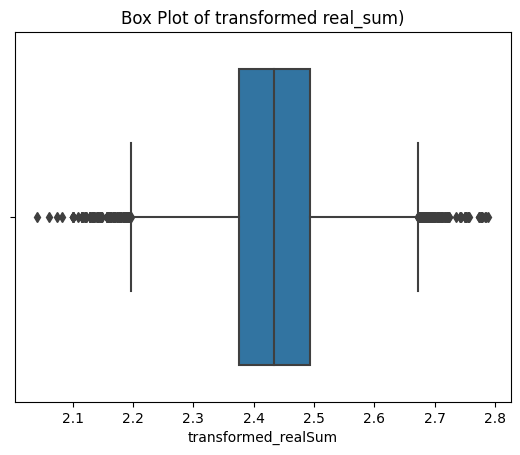

In [38]:
sns.boxplot(x=df['transformed_realSum'])
plt.title('Box Plot of transformed real_sum)')
plt.show()

# **Relationships among response and other variables**

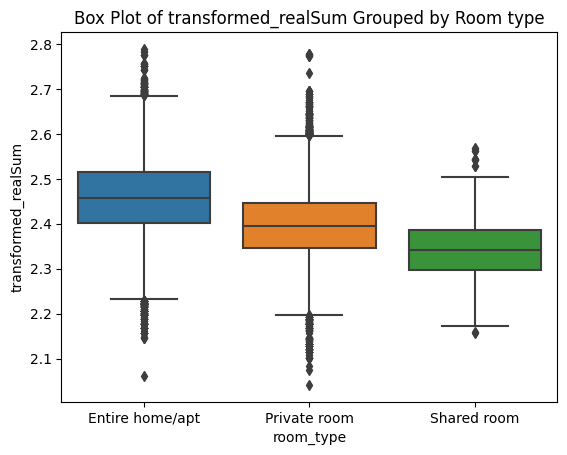

In [39]:
#boxplot of room type and real_sum with outliers
sns.boxplot(x='room_type', y='transformed_realSum', data=df)
plt.title('Box Plot of transformed_realSum Grouped by Room type')
plt.show()

#boxplot of room type and log(real sum)
#sns.boxplot(x='room_type', y='realSum', data=log_df1)
#plt.title('Box Plot of log(real_sum) Grouped by Room type')
#plt.show()

In [40]:
df_copy = df.copy()

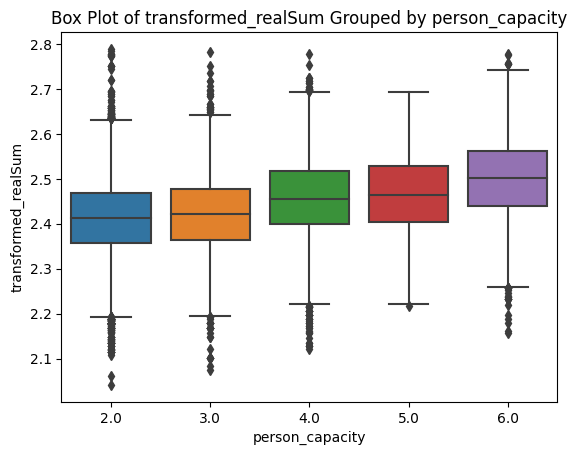

In [41]:
#boxplot of person_capacity with transformed_realSum
sns.boxplot(x='person_capacity', y='transformed_realSum', data=df)
plt.title('Box Plot of transformed_realSum Grouped by person_capacity')
plt.show()

#boxplot with person_capacity with log(real_sum) with outliers
#sns.boxplot(x='person_capacity', y='realSum', data=log_df1)
#plt.title('Box Plot of log(real_sum) Grouped by person_capacity')
#plt.show()

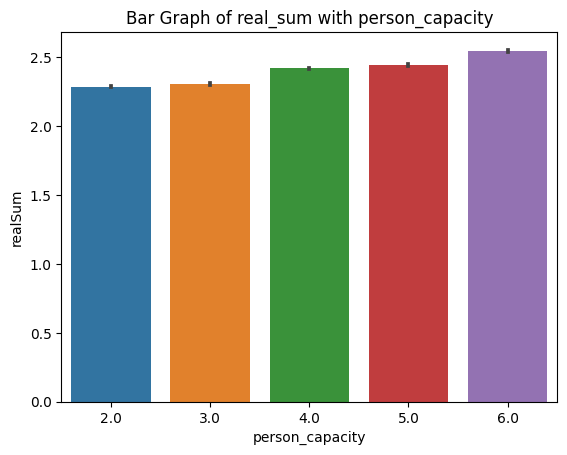

In [42]:
#bar graph with person_capacity with log(real_sum) with outliers
sns.barplot(x='person_capacity', y='realSum', data=log_df1)
plt.title('Bar Graph of real_sum with person_capacity')
plt.xlabel('person_capacity')
plt.ylabel('realSum')
plt.show()

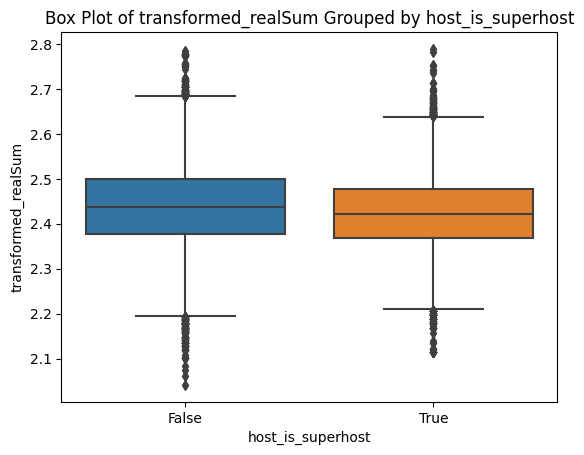

In [43]:
#boxplot of host_is_superhost with transformed_realSum
sns.boxplot(x='host_is_superhost', y='transformed_realSum', data=df)
plt.title('Box Plot of transformed_realSum Grouped by host_is_superhost')
plt.show()

#boxplot of host_is_superhost with log(realSum)
#sns.boxplot(x='host_is_superhost', y='realSum', data=log_df1)
#plt.title('Box Plot of realSum Grouped by host_is_superhost')
#plt.show()


In [44]:
#Separate the continuous variable(s) by the levels of 'host is superhost or not'
continuous_var_host_is_superhost_true = df_copy[df_copy['host_is_superhost'] == True]['transformed_realSum']
continuous_var_host_is_superhost_false = df_copy[df_copy['host_is_superhost'] == False]['transformed_realSum']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_host_is_superhost_true, continuous_var_host_is_superhost_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")

Kruskal-Wallis Statistic: 260.93458423261825
P-Value: 1.0734961137358892e-58
Reject null hypothesis: There is a significant difference in the distributions.


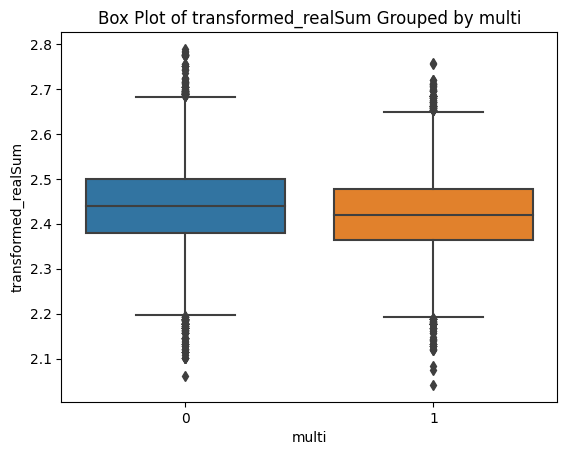

In [45]:
#boxplot of multi with transformed_realSum
sns.boxplot(x='multi', y='transformed_realSum', data=df)
plt.title('Box Plot of transformed_realSum Grouped by multi')
plt.show()

#boxplot of multiple rooms or not with log(real_sum) with outliers
#sns.boxplot(x='multi', y='realSum', data=log_df1)
#plt.title('Box Plot of log(real_sum) Grouped by Multiple rooms or not')
#plt.show()

In [46]:
#Separate the continuous variable(s) by the levels of 'multi'
continuous_var_multi_true = df_copy[df_copy['multi'] == 1]['transformed_realSum']
continuous_var_multi_false = df_copy[df_copy['multi'] == 0]['transformed_realSum']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_multi_true, continuous_var_multi_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")

Kruskal-Wallis Statistic: 431.8492905164025
P-Value: 6.432682376544186e-96
Reject null hypothesis: There is a significant difference in the distributions.


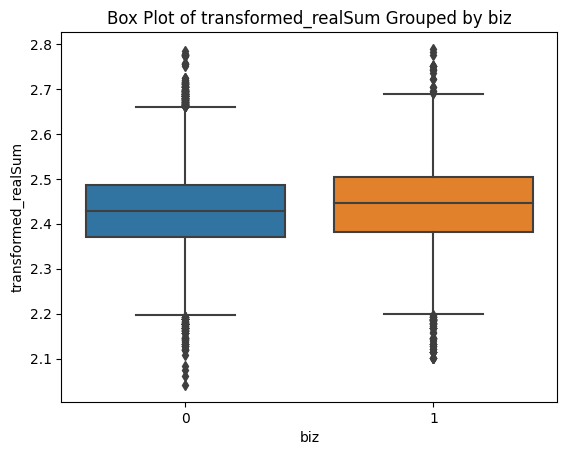

In [47]:
#boxplot of biz with transformed_realSum
sns.boxplot(x='biz', y='transformed_realSum', data=df)
plt.title('Box Plot of transformed_realSum Grouped by biz')
plt.show()

#boxplot of biz with log(real_sum) with outliers
#sns.boxplot(x='biz', y='realSum', data=log_df1)
#plt.title('Box Plot of log(real_sum) Grouped by Business purpose or not')
#plt.show()

In [48]:
#Separate the continuous variable(s) by the levels of 'biz'
continuous_var_biz_true = df_copy[df_copy['biz'] == 1]['transformed_realSum']
continuous_var_biz_false = df_copy[df_copy['biz'] == 0]['transformed_realSum']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_biz_true, continuous_var_biz_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")

Kruskal-Wallis Statistic: 326.5290748551439
P-Value: 5.4798849010985774e-73
Reject null hypothesis: There is a significant difference in the distributions.


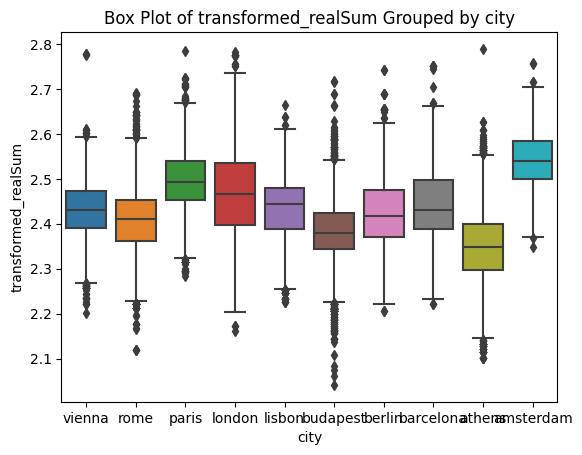

In [49]:
#boxplot of city with transformed_realSum
sns.boxplot(x='city', y='transformed_realSum', data=df)
plt.title('Box Plot of transformed_realSum Grouped by city')
plt.show()

#boxplot of city or not with log(real_sum) with outliers
#sns.boxplot(x='city', y='realSum', data=log_df1)
#plt.title('Box Plot of log(real_sum) Grouped by city')
#plt.show()

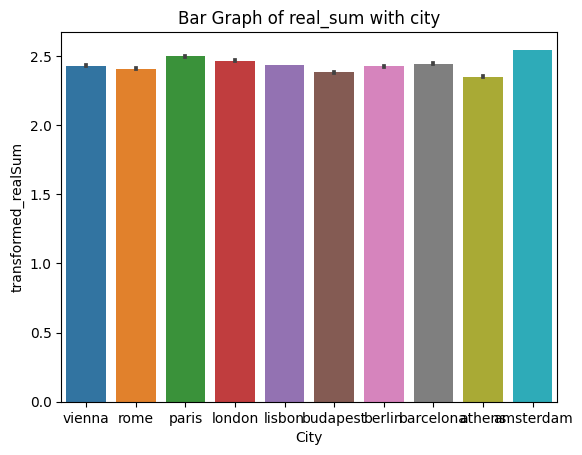

In [50]:
#bar graph of city with transformed_realSum with outliers
sns.barplot(x='city', y='transformed_realSum', data=df)
plt.title('Bar Graph of real_sum with city')
plt.xlabel('City')
plt.ylabel('transformed_realSum')
plt.show()

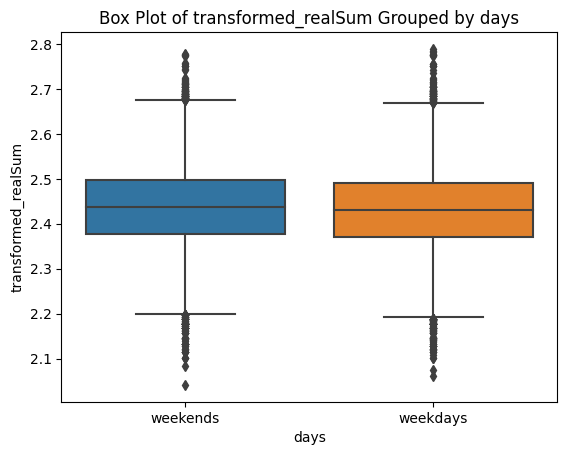

In [51]:
#boxplot of days with transformed_realSum
sns.boxplot(x='days', y='transformed_realSum', data=df)
plt.title('Box Plot of transformed_realSum Grouped by days')
plt.show()

#boxplot of days with log(real_sum) with outliers
#sns.boxplot(x='days', y='realSum', data=log_df1)
#plt.title('Box Plot of log(real_sum) Grouped by days')
#plt.show()

In [52]:
#Separate the continuous variable(s) by the levels of 'days'
continuous_var_date_true = df_copy[df_copy['days'] == 'weekdays']['transformed_realSum']
continuous_var_date_false = df_copy[df_copy['days'] == 'weekends']['transformed_realSum']

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(continuous_var_date_true, continuous_var_date_false)

# Print the results
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the distributions.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the distributions.")

Kruskal-Wallis Statistic: 66.39795342322819
P-Value: 3.684845245467588e-16
Reject null hypothesis: There is a significant difference in the distributions.


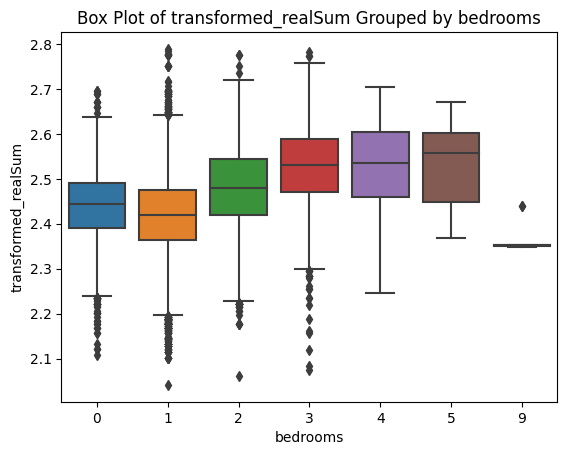

In [53]:
#boxplot of bedrooms with transformed_realSum
sns.boxplot(x='bedrooms', y='transformed_realSum', data=df)
plt.title('Box Plot of transformed_realSum Grouped by bedrooms')
plt.show()

#boxplot of bedrooms with log(real_sum) with outliers
#sns.boxplot(x='bedrooms', y='realSum', data=log_df1)
#plt.title('Box Plot of log(real_sum) Grouped by bedrooms')
#plt.show()

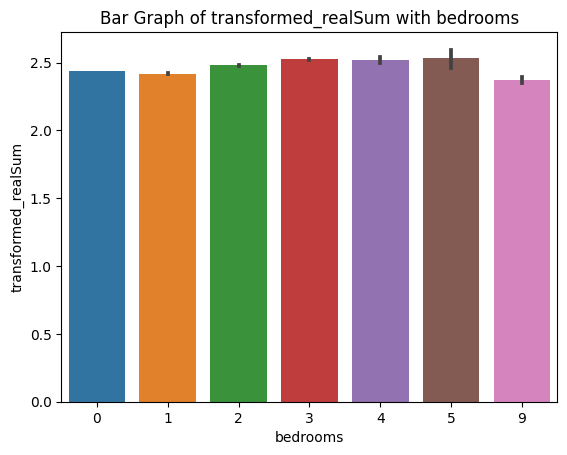

In [54]:
#bar graph with bedrooms with log(real_sum) with outliers
sns.barplot(x='bedrooms', y='transformed_realSum', data=df)
plt.title('Bar Graph of transformed_realSum with bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('transformed_realSum')
plt.show()

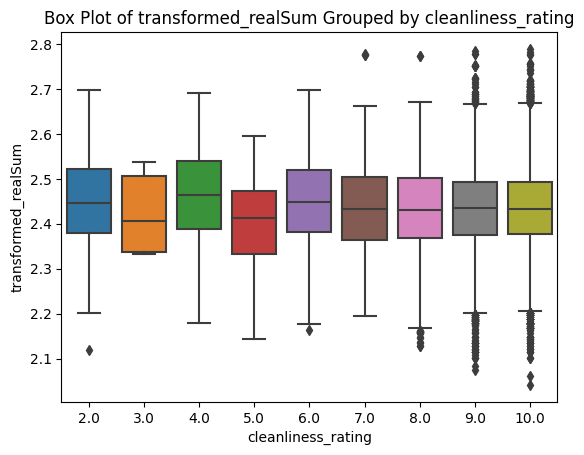

In [55]:
#boxplot of cleanliness_rating with transformed_realSum
sns.boxplot(x='cleanliness_rating', y='transformed_realSum', data=df)
plt.title('Box Plot of transformed_realSum Grouped by cleanliness_rating')
plt.show()

#boxplot of cleanliness_rating with log(real_sum) with outliers
#sns.boxplot(x='cleanliness_rating', y='realSum', data=log_df1)
#plt.title('Box Plot of log(real_sum) Grouped cleanliness_rating')
#plt.show()

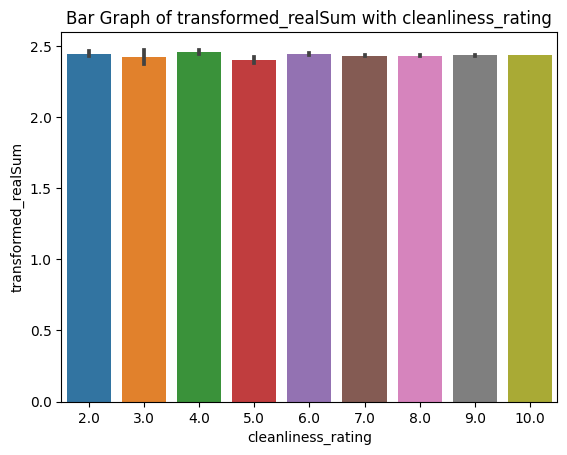

In [56]:
#bar graph with cleanliness_rating with transformed_realSum with outliers
sns.barplot(x='cleanliness_rating', y='transformed_realSum', data=df)
plt.title('Bar Graph of transformed_realSum with cleanliness_rating')
plt.xlabel('cleanliness_rating')
plt.ylabel('transformed_realSum')
plt.show()

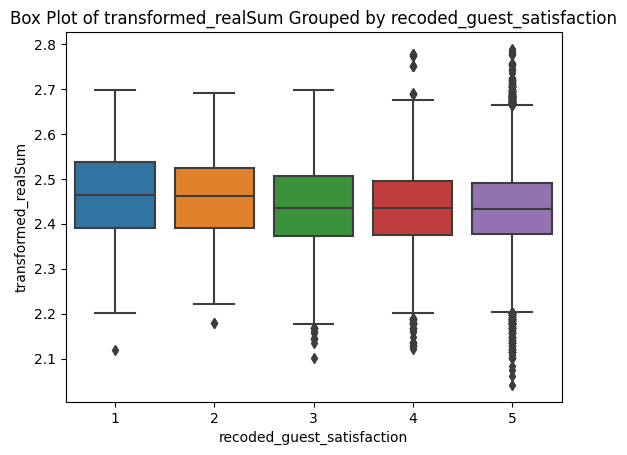

In [57]:
#boxplot of recoded_guest_satisfaction with transformed_realSum
sns.boxplot(x='recoded_guest_satisfaction', y='transformed_realSum', data=df)
plt.title('Box Plot of transformed_realSum Grouped by recoded_guest_satisfaction')
plt.show()

#boxplot of recoded_guest_satisfaction with log(real_sum) with outliers
#sns.boxplot(x='recoded_guest_satisfaction', y='realSum', data=log_df1)
#plt.title('Box Plot of log(real_sum) Grouped recoded_guest_satisfaction')
#plt.show()



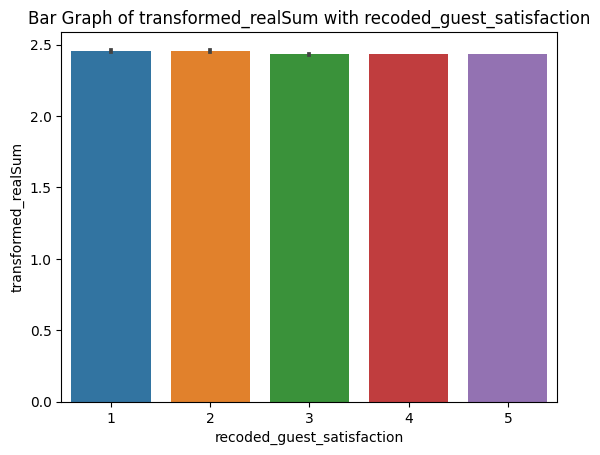

In [58]:
#bar graph with recoded_guest_satisfaction with transformed_realSum with outliers
sns.barplot(x='recoded_guest_satisfaction', y='transformed_realSum', data=df)
plt.title('Bar Graph of transformed_realSum with recoded_guest_satisfaction')
plt.xlabel('recoded_guest_satisfaction')
plt.ylabel('transformed_realSum')
plt.show()

# **Transforming other variables**

**Log transformattion**

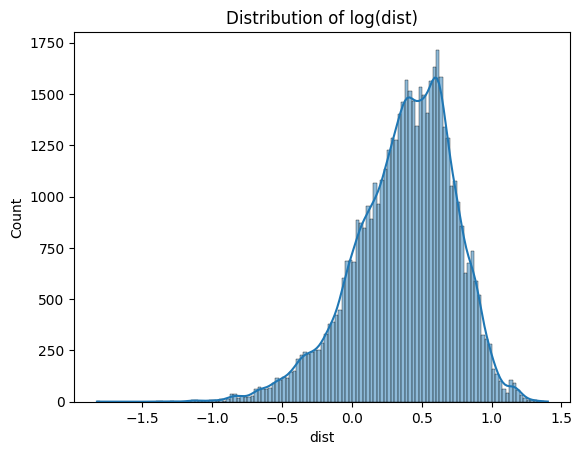

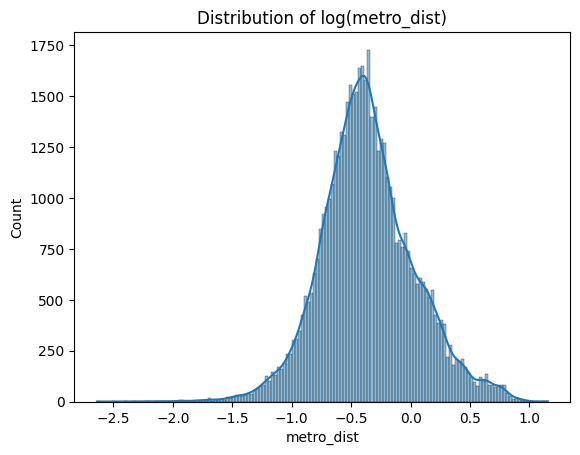

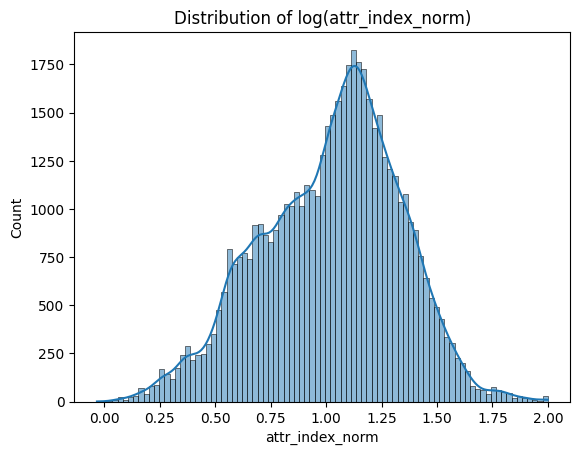

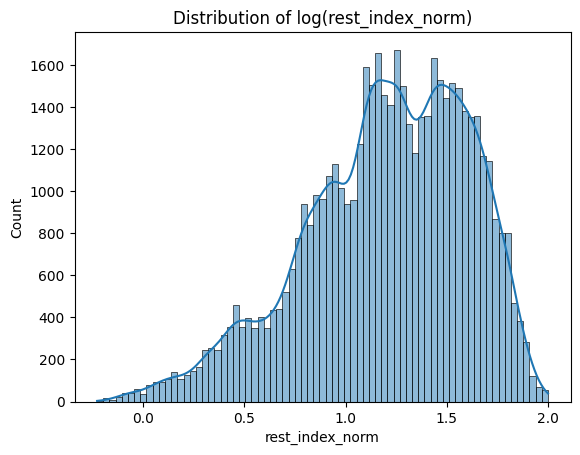

In [59]:
#transform the response variable (with outliers)
log_df3 = df.copy(deep=True)
log_df3['dist'] = log_df3['dist'].apply(lambda x : np.log10(x))
log_df3['metro_dist'] = log_df3['metro_dist'].apply(lambda x : np.log10(x))
log_df3['attr_index_norm'] = log_df3['attr_index_norm'].apply(lambda x : np.log10(x))
log_df3['rest_index_norm'] = log_df3['rest_index_norm'].apply(lambda x : np.log10(x))

#plot histograms

sns.histplot(log_df3['dist'], kde=True)
plt.title('Distribution of log(dist)')
plt.show()

sns.histplot(log_df3['metro_dist'], kde=True)
plt.title('Distribution of log(metro_dist)')
plt.show()


sns.histplot(log_df3['attr_index_norm'], kde=True)
plt.title('Distribution of log(attr_index_norm)')
plt.show()

#sns.histplot(log_df3['rest_index'], kde=True)
#plt.title('Distribution of log(rest_index)')
#plt.show()

sns.histplot(log_df3['rest_index_norm'], kde=True)
plt.title('Distribution of log(rest_index_norm)')
plt.show()



**Box cox transformation**

Optimal lambda value: 0.251540236803728


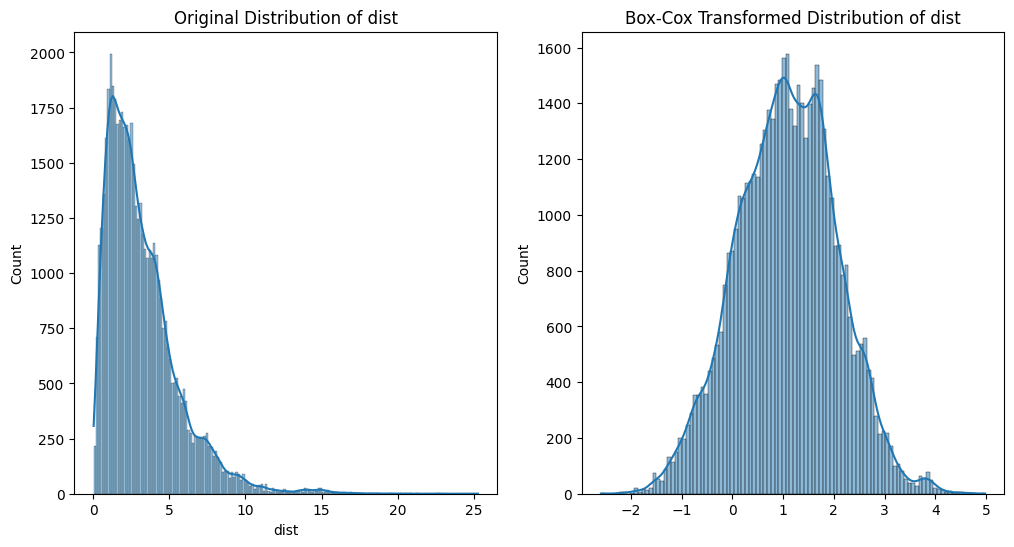

Optimal lambda value: -0.05490725960737776


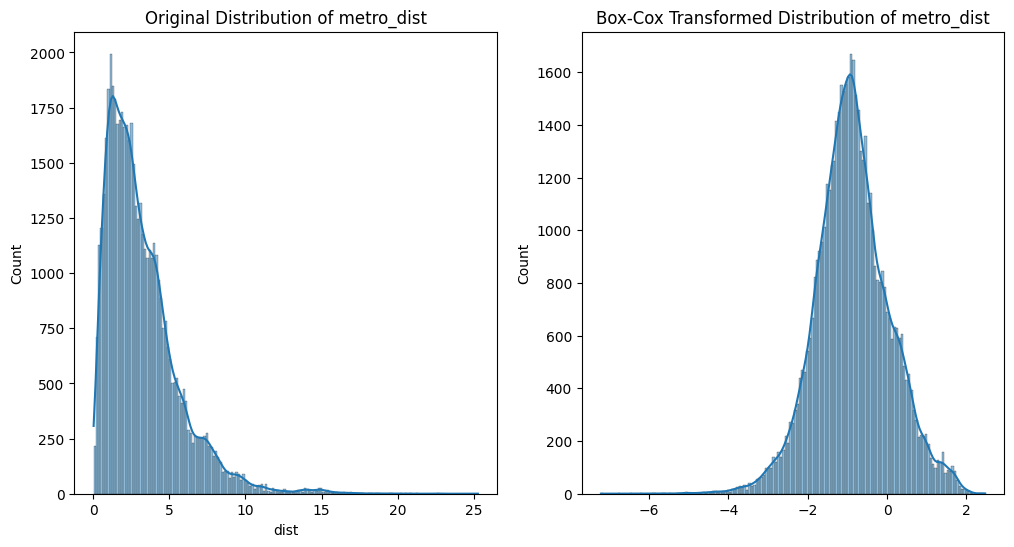

Optimal lambda value: 0.13319719593981055


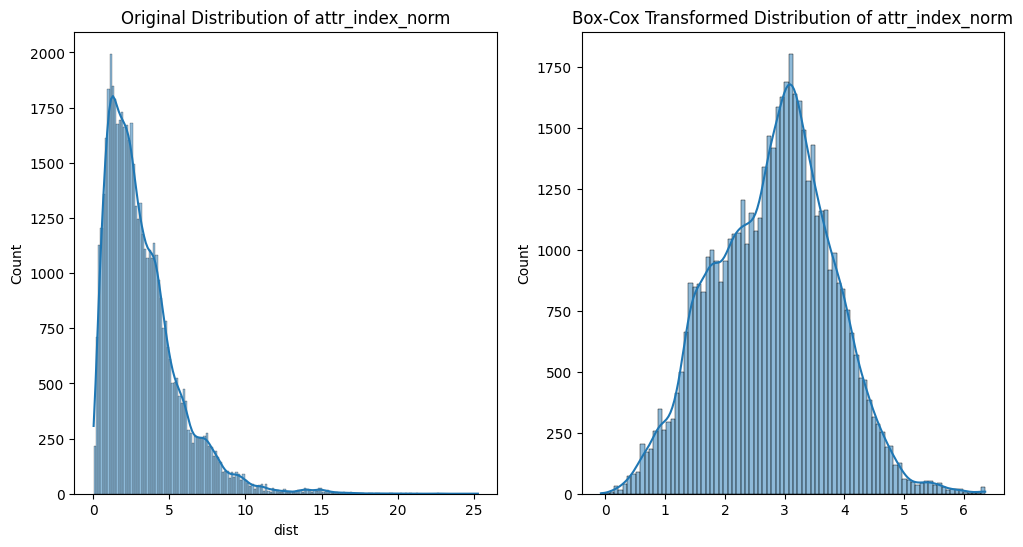

Optimal lambda value: 0.26656980316684725


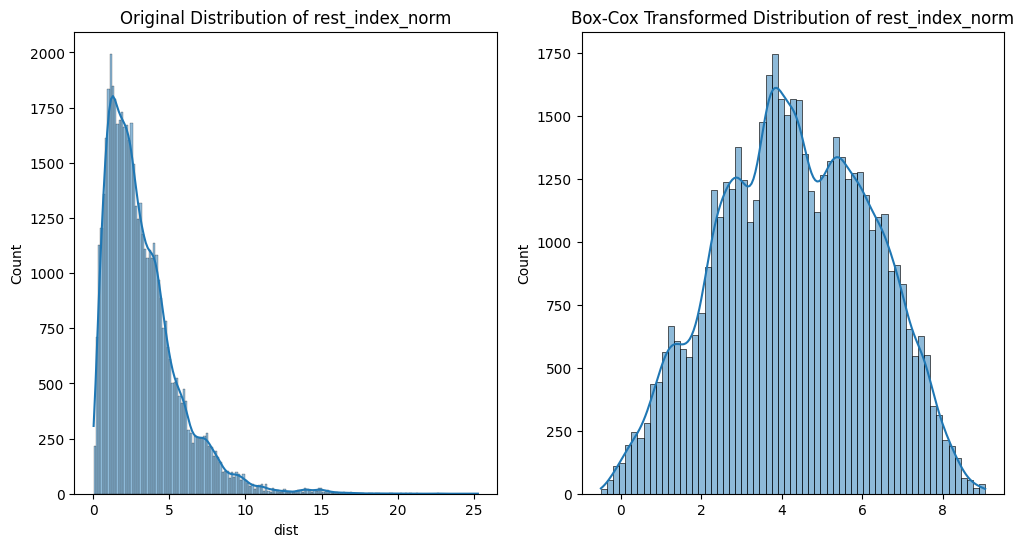

In [60]:
# Extract the 'dist' variable
dist_variable = df['dist']
transformed_dist, lambda_value = boxcox(dist_variable)
df['transformed_dist'] = transformed_dist
print(f"Optimal lambda value: {lambda_value}")
plt.figure(figsize=(12, 6))
# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(dist_variable, kde=True)
plt.title('Original Distribution of dist')
# Transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(transformed_dist, kde=True)
plt.title('Box-Cox Transformed Distribution of dist')
plt.show()

# Extract the 'metro_dist' variable
metro_dist_variable = df['metro_dist']
transformed_metro_dist, lambda_value = boxcox(metro_dist_variable)
df['transformed_metro_dist'] = transformed_metro_dist
print(f"Optimal lambda value: {lambda_value}")
plt.figure(figsize=(12, 6))
# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(dist_variable, kde=True)
plt.title('Original Distribution of metro_dist')
# Transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(transformed_metro_dist, kde=True)
plt.title('Box-Cox Transformed Distribution of metro_dist')
plt.show()

# Extract the 'attr_index_norm' variable
attr_index_norm_variable = df['attr_index_norm']
transformed_attr_index_norm, lambda_value = boxcox(attr_index_norm_variable)
df['transformed_attr_index_norm'] = transformed_attr_index_norm
print(f"Optimal lambda value: {lambda_value}")
plt.figure(figsize=(12, 6))
# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(dist_variable, kde=True)
plt.title('Original Distribution of attr_index_norm')
# Transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(transformed_attr_index_norm, kde=True)
plt.title('Box-Cox Transformed Distribution of attr_index_norm')
plt.show()

# Extract the 'rest_index' variable
#rest_index_variable = df['rest_index']
#transformed_rest_index, lambda_value = boxcox(rest_index_variable)
#df['transformed_rest_index'] = transformed_rest_index
#print(f"Optimal lambda value: {lambda_value}")
#plt.figure(figsize=(12, 6))
# Original distribution
#plt.subplot(1, 2, 1)
#sns.histplot(dist_variable, kde=True)
#plt.title('Original Distribution of rest_index')
# Transformed distribution
#plt.subplot(1, 2, 2)
#sns.histplot(transformed_rest_index, kde=True)
#plt.title('Box-Cox Transformed Distribution of rest_index')
#plt.show()

# Extract the 'rest_index_norm' variable
rest_index_norm_variable = df['rest_index_norm']
transformed_rest_index_norm, lambda_value = boxcox(rest_index_norm_variable)
df['transformed_rest_index_norm'] = transformed_rest_index_norm
print(f"Optimal lambda value: {lambda_value}")
plt.figure(figsize=(12, 6))
# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(dist_variable, kde=True)
plt.title('Original Distribution of rest_index_norm')
# Transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(transformed_rest_index_norm, kde=True)
plt.title('Box-Cox Transformed Distribution of rest_index_norm')
plt.show()

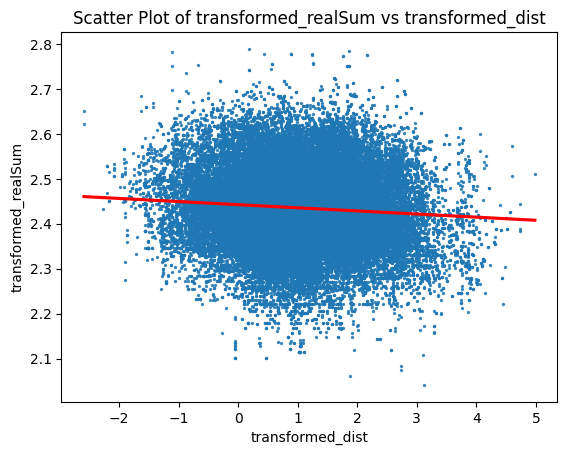

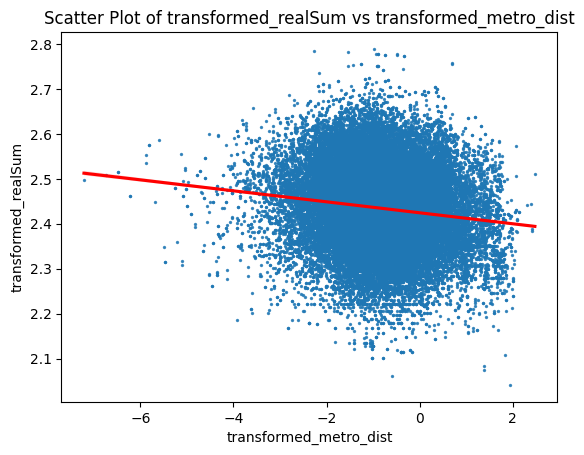

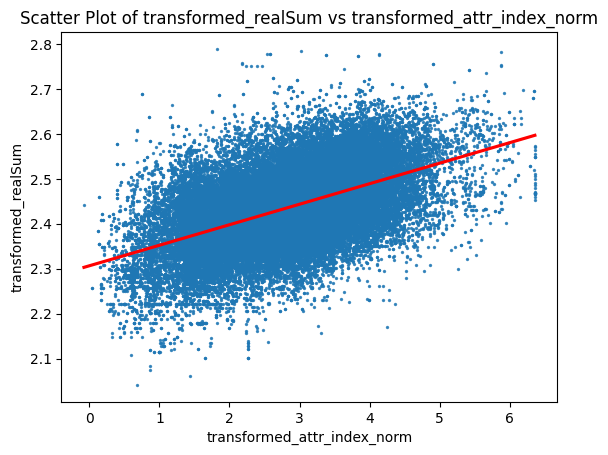

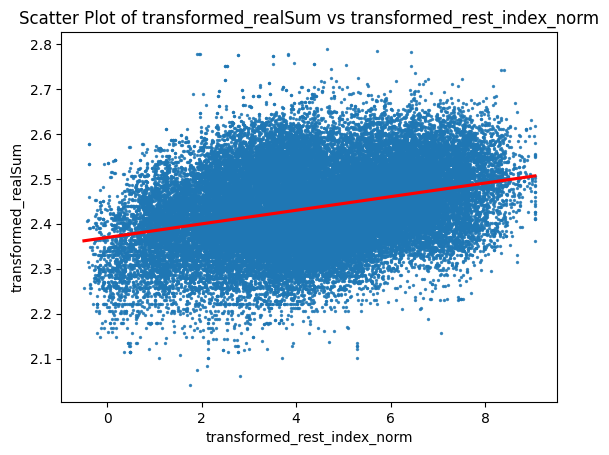

In [61]:
#scatter plot of transformed_realSum vs transformed_dist
sns.regplot(x='transformed_dist', y='transformed_realSum', data=df, scatter_kws={'s': 2}, line_kws={'color': 'red'})
plt.title('Scatter Plot of transformed_realSum vs transformed_dist')
plt.xlabel('transformed_dist')
plt.ylabel('transformed_realSum')
plt.show()

#sns.regplot(x='explanatory_variable', y='response_variable', data=df, scatter_kws={'s': 10})  # 's' adjusts the size of the markers
#plt.title('Scatter Plot with Trendline')
#plt.xlabel('Explanatory Variable')
#plt.ylabel('Response Variable')
#plt.show()

#scatter plot of transformed_realSum vs transformed_metro_dist
sns.regplot(x='transformed_metro_dist', y='transformed_realSum', data=df, scatter_kws={'s': 2}, line_kws={'color': 'red'})
plt.title('Scatter Plot of transformed_realSum vs transformed_metro_dist')
plt.xlabel('transformed_metro_dist')
plt.ylabel('transformed_realSum')
plt.show()

#scatter plot of transformed_realSum vs transformed_attr_index
#sns.regplot(x='transformed_attr_index', y='transformed_realSum', data=df, scatter_kws={'s': 2}, line_kws={'color': 'red'})
#plt.title('Scatter Plot of transformed_realSum vs transformed_attr_index')
#plt.xlabel('transformed_attr_index')
#plt.ylabel('transformed_realSum')
#plt.show()

#scatter plot of transformed_realSum vs transformed_attr_index_norm
sns.regplot(x='transformed_attr_index_norm', y='transformed_realSum', data=df, scatter_kws={'s': 2}, line_kws={'color': 'red'})
plt.title('Scatter Plot of transformed_realSum vs transformed_attr_index_norm')
plt.xlabel('transformed_attr_index_norm')
plt.ylabel('transformed_realSum')
plt.show()

#scatter plot of transformed_realSum vs transformed_rest_index
#sns.regplot(x='transformed_rest_index', y='transformed_realSum', data=df, scatter_kws={'s': 2}, line_kws={'color': 'red'})
#plt.title('Scatter Plot of transformed_realSum vs transformed_rest_index')
#plt.xlabel('transformed_rest_index')
#plt.ylabel('transformed_realSum')
#plt.show()

#scatter plot of transformed_realSum vs transformed_rest_index_norm
sns.regplot(x='transformed_rest_index_norm', y='transformed_realSum', data=df, scatter_kws={'s': 2}, line_kws={'color': 'red'})
plt.title('Scatter Plot of transformed_realSum vs transformed_rest_index_norm')
plt.xlabel('transformed_rest_index_norm')
plt.ylabel('transformed_realSum')
plt.show()


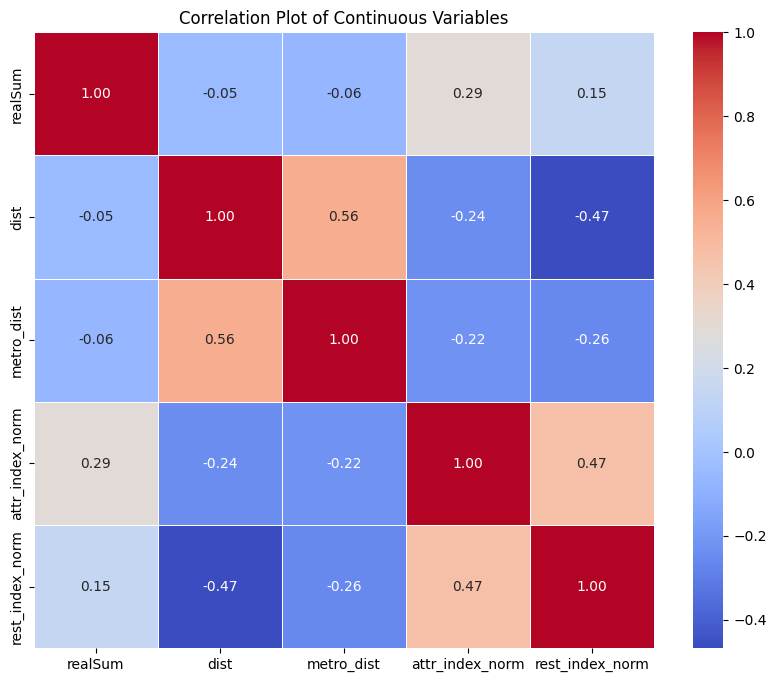

In [62]:
df_continuous = df[continuous_cols]

# Calculate the correlation matrix
corr_matrix = df_continuous.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Plot of Continuous Variables')
plt.show()

In [63]:
continuous_cols_new=["transformed_realSum","transformed_dist","transformed_metro_dist","transformed_attr_index_norm","transformed_rest_index_norm"]

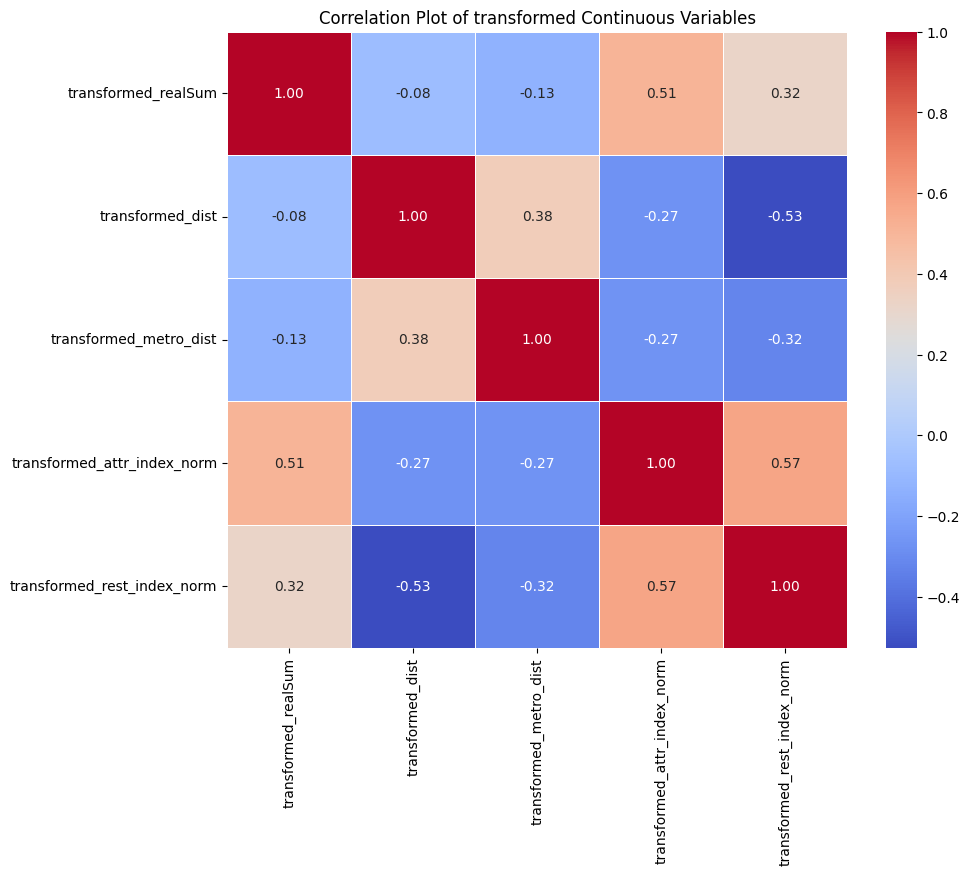

In [64]:
df_continuous_new = df[continuous_cols_new]

# Calculate the correlation matrix
corr_matrix_new = df_continuous_new.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_new, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Plot of transformed Continuous Variables')
plt.show()


In [65]:
#Encoding variables
# Separate continuous and categorical columns
#continuous_columns=['transformed_realSum','transformed_dist','transformed_metro_dist','transformed_attr_index_norm','transformed_rest_index_norm']
#categorical_columns=['person_capacity','room_type','host_is_superhost','multi','biz','cleanliness_rating','recoded_guest_satisfaction','bedrooms','city','days']

# One-hot encode categorical variables
#df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

#X = df_encoded.drop('transformed_realSum', axis=1)
#y = df_encoded['transformed_realSum']



In [66]:
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#model.fit(X, y)

In [67]:
# Get the coefficients of the logistic regression model
#coefficients = model.coef_[0]

# Calculate the VIF for each variable
#vif_data = pd.DataFrame()
#vif_data['Variable'] = X.columns
#vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


# Display the VIF values
#print(vif_data)

In [68]:
df_copy =df.copy()

In [69]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51701 entries, 0 to 1102
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   realSum                      51701 non-null  float64 
 1   room_type                    51701 non-null  object  
 2   person_capacity              51701 non-null  float64 
 3   host_is_superhost            51701 non-null  bool    
 4   multi                        51701 non-null  int64   
 5   biz                          51701 non-null  int64   
 6   cleanliness_rating           51701 non-null  float64 
 7   guest_satisfaction_overall   51701 non-null  float64 
 8   bedrooms                     51701 non-null  int64   
 9   dist                         51701 non-null  float64 
 10  metro_dist                   51701 non-null  float64 
 11  attr_index_norm              51701 non-null  float64 
 12  rest_index_norm              51701 non-null  float64 
 13  ci

In [71]:
drop_cols=["guest_satisfaction_overall","attr_index_norm","rest_index_norm","realSum","dist","metro_dist"]
df_copy.drop(columns=drop_cols,axis=1,inplace=True)

In [72]:
# Assuming df is your DataFrame and 'your_column' is the column you want to convert
df_copy['recoded_guest_satisfaction'] = df['recoded_guest_satisfaction'].astype(int)

In [73]:
df_copy['host_is_superhost'] = df_copy['host_is_superhost'].astype(int)

In [74]:
unique_values = df_copy['host_is_superhost'].unique()
print(unique_values)

[1 0]


In [75]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51701 entries, 0 to 1102
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    51701 non-null  object 
 1   person_capacity              51701 non-null  float64
 2   host_is_superhost            51701 non-null  int64  
 3   multi                        51701 non-null  int64  
 4   biz                          51701 non-null  int64  
 5   cleanliness_rating           51701 non-null  float64
 6   bedrooms                     51701 non-null  int64  
 7   city                         51701 non-null  object 
 8   days                         51701 non-null  object 
 9   recoded_guest_satisfaction   51701 non-null  int64  
 10  transformed_realSum          51701 non-null  float64
 11  transformed_dist             51701 non-null  float64
 12  transformed_metro_dist       51701 non-null  float64
 13  transformed_attr_

In [76]:
df_copy.head()

,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,bedrooms,city,days,recoded_guest_satisfaction,transformed_realSum,transformed_dist,transformed_metro_dist,transformed_attr_index_norm,transformed_rest_index_norm
0,Entire home/apt,4.0,1,0,1,10.0,2,vienna,weekends,5,2.495937,1.368116,-0.500308,2.149759,1.337361
1,Entire home/apt,2.0,1,0,1,10.0,1,vienna,weekends,5,2.377583,0.894716,0.112537,2.537371,1.577170
2,Entire home/apt,3.0,1,0,1,9.0,1,vienna,weekends,5,2.421936,0.964508,-0.810671,2.549759,2.008143
3,Private room,2.0,0,0,0,8.0,1,vienna,weekends,5,2.314996,1.522495,-0.763900,1.657957,0.914807
4,Entire home/apt,4.0,1,0,1,9.0,1,vienna,weekends,5,2.421936,0.976782,-0.831162,2.534810,1.975764


In [77]:
df_copy.isnull().sum()

room_type                      0
person_capacity                0
host_is_superhost              0
multi                          0
biz                            0
cleanliness_rating             0
bedrooms                       0
city                           0
days                           0
recoded_guest_satisfaction     0
transformed_realSum            0
transformed_dist               0
transformed_metro_dist         0
transformed_attr_index_norm    0
transformed_rest_index_norm    0
dtype: int64

In [78]:
#Encoding variables
# Separate continuous and categorical columns
#continuous_columns=['transformed_realSum','transformed_dist','transformed_metro_dist','transformed_attr_index','transformed_attr_index_norm','transformed_rest_index','transformed_rest_index_norm','person_capacity',]
categorical_columns=['room_type','city',"days"]

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_copy, columns=categorical_columns, drop_first=True)

X = df_encoded.drop('transformed_realSum', axis=1)
y = df_encoded['transformed_realSum']



In [80]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [81]:
# Get the coefficients of the logistic regression model
coefficients = model.coef_[0]

# Calculate the VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


# Display the VIF values
print(vif_data)

                       Variable         VIF
0               person_capacity   14.030770
1             host_is_superhost    1.500198
2                         multi    1.932787
3                           biz    2.374750
4            cleanliness_rating  138.493977
5                      bedrooms    7.065666
6    recoded_guest_satisfaction   94.921834
7              transformed_dist    7.316161
8        transformed_metro_dist    2.701086
9   transformed_attr_index_norm   60.731036
10  transformed_rest_index_norm   51.288621
11       room_type_Private room    2.475593
12        room_type_Shared room    1.025818
13                  city_athens    3.919564
14               city_barcelona    2.424951
15                  city_berlin    2.567903
16                city_budapest    2.963596
17                  city_lisbon    4.192392
18                  city_london    9.471290
19                   city_paris    5.379100
20                    city_rome    5.270994
21                  city_vienna 

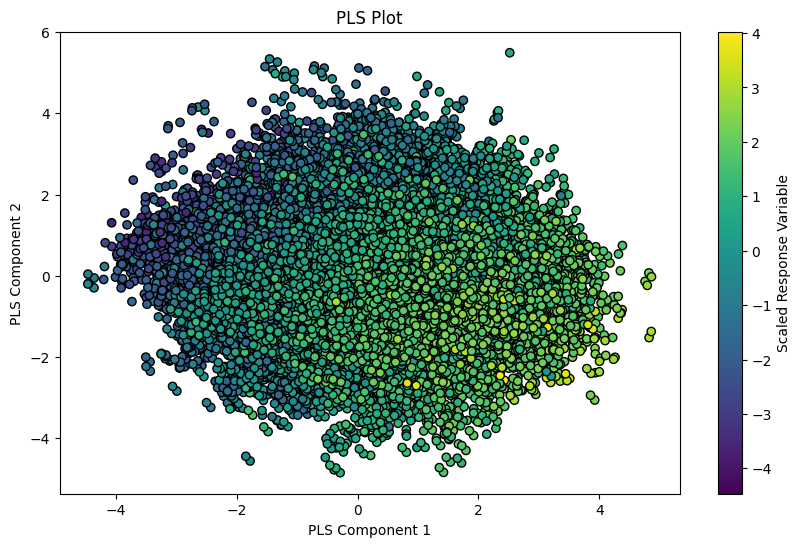

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import scale

# Center and scale the data
X_scaled = scale(X)
y_scaled = scale(y)

# Initialize PLS Regression model
n_components = min(X.shape[1], X.shape[0])

# Initialize the PLS model
pls_reg = PLSRegression(n_components=2)

# Fit the PLS-DA model on the scaled data
pls_reg.fit(X, y)

# Transform the original features into the PLS-DA space
X_pls_reg = pls_reg.transform(X)

# Get the PLS components
pls_components = pls_reg.x_scores_

# Plot the PLS components
plt.figure(figsize=(10, 6))
plt.scatter(pls_components[:, 0], pls_components[:, 1], c=y_scaled, cmap='viridis', edgecolors='k')
plt.title('PLS Plot')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.colorbar(label='Scaled Response Variable')
plt.show()


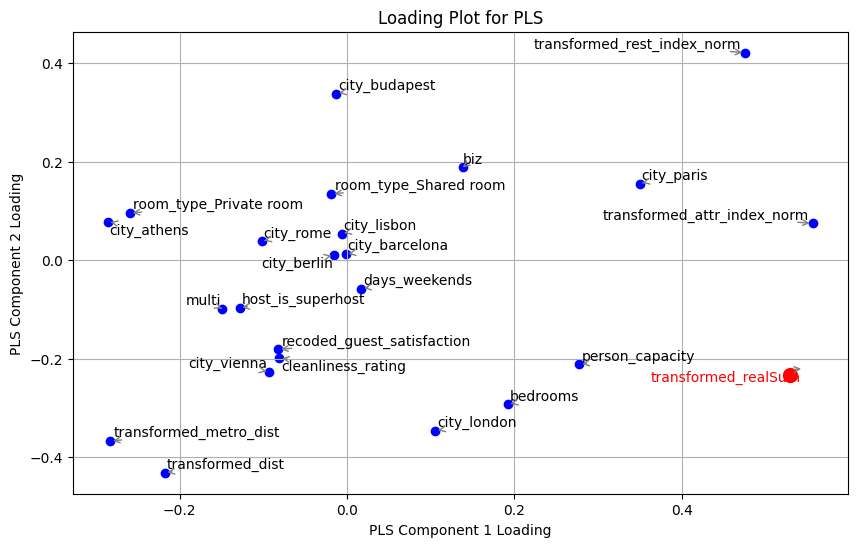

In [95]:
# Get the feature names from the original data
feature_names = X.columns

# Get the loadings from the PLS-DA model
loadings = pls_reg.x_loadings_

# Get the y-loadings from the PLS-DA model
y_loadings = pls_reg.y_loadings_

# Create a scatter plot of the loadings
plt.figure(figsize=(10, 6))
scatter = plt.scatter(loadings[:, 0], loadings[:, 1], c='b', marker='o')

plt.xlabel('PLS Component 1 Loading')
plt.ylabel('PLS Component 2 Loading')

# Annotate the points with feature names
annotations = []
for i, txt in enumerate(feature_names):
    annotation = plt.annotate(txt, (loadings[i, 0], loadings[i, 1]), fontsize=10, ha='right')
    annotations.append(annotation)

# Plot the Churn variable as a separate red dot
transformed_realSum_dot = plt.scatter(y_loadings[0, 0], y_loadings[0, 1], c='r', marker='o', s=100)
transformed_realSum_annotation = plt.annotate('transformed_realSum', (y_loadings[0, 0], y_loadings[0, 1]), fontsize=10, ha='right', color='r',
                                xytext=(10, 5), textcoords='offset points')

# Combine all annotations for adjustment
all_annotations = annotations + [transformed_realSum_annotation]

# Use adjustText to automatically adjust label positions
adjust_text(all_annotations, arrowprops=dict(arrowstyle='->', color='gray'))

plt.title('Loading Plot for PLS')
plt.grid(True)
plt.show()


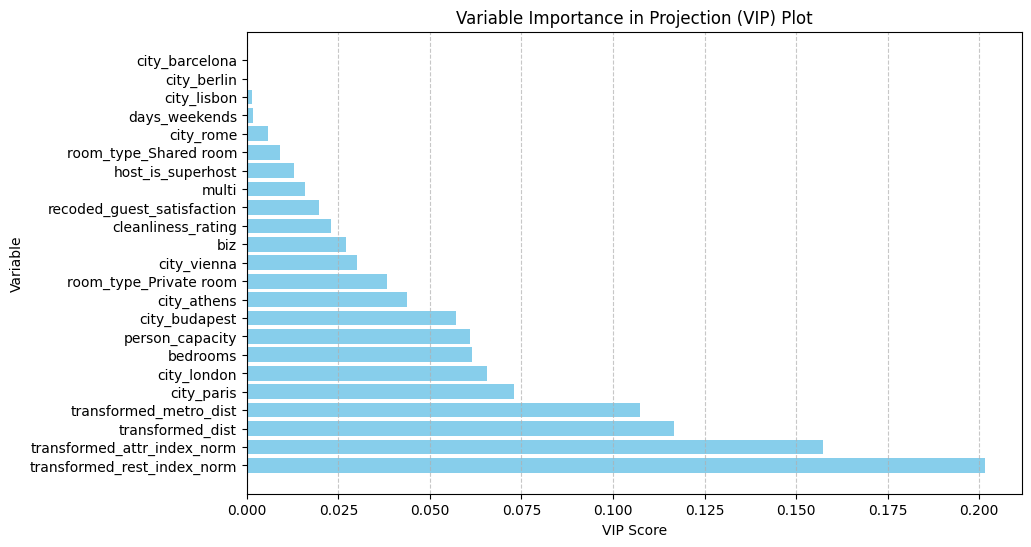

In [96]:
# Calculate VIP scores
n_components = 2  # Number of components used in PLS-DA
n_features = X.shape[1]  # Number of features

# Initialize VIP scores
vip_scores = np.zeros(n_features)

# Calculate VIP scores for each component
for i in range(n_components):
    w = pls_reg.x_weights_[:, i]
    c = np.sum(w ** 2)
    vip_scores += (c * (pls_reg.x_loadings_[:, i] ** 2))

# Normalize VIP scores by dividing by the number of components
vip_scores /= n_components

# Create a DataFrame to store VIP scores and variable names
vip_df = pd.DataFrame({'Variable': X.columns, 'VIP Score': vip_scores})

# Sort VIP scores in descending order
vip_df = vip_df.sort_values(by='VIP Score', ascending=False)

# Create the VIP plot
plt.figure(figsize=(10, 6))
plt.barh(vip_df['Variable'], vip_df['VIP Score'], color='skyblue')
plt.xlabel('VIP Score')
plt.ylabel('Variable')
plt.title('Variable Importance in Projection (VIP) Plot')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# **Advance Analysis**

In [139]:
# Remove correlated variables

# Specify the columns to drop
columns_to_drop = ['room_type_Private room', 'city_vienna','biz','cleanliness_rating','recoded_guest_satisfaction', 'multi', 'host_is_superhost','room_type_Shared room','city_rome','days_weekends','city_lisbon','city_berlin','city_barcelona','city_athens']

# Drop the specified columns in-place
df_encoded.drop(columns=columns_to_drop, inplace=True)

KeyError: ignored

**After removing correlated variables lets try fitting pls again**

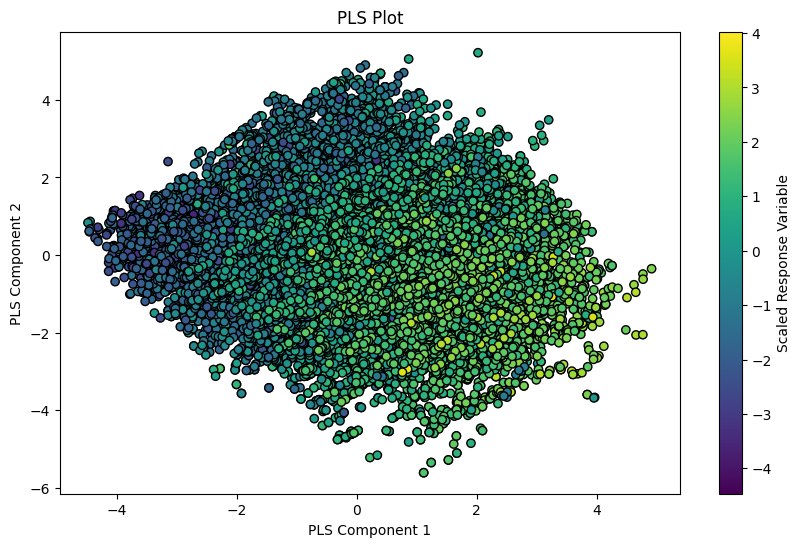

In [108]:
X1 = df_encoded.drop('transformed_realSum', axis=1)
y1 = df_encoded['transformed_realSum']

# Center and scale the data
X_scaled = scale(X1)
y_scaled = scale(y1)

# Initialize PLS Regression model
n_components = min(X.shape[1], X.shape[0])

# Initialize the PLS model
pls_reg = PLSRegression(n_components=2)

# Fit the PLS-DA model on the scaled data
pls_reg.fit(X1, y1)

# Transform the original features into the PLS-DA space
X_pls_reg = pls_reg.transform(X1)

# Get the PLS components
pls_components = pls_reg.x_scores_

# Plot the PLS components
plt.figure(figsize=(10, 6))
plt.scatter(pls_components[:, 0], pls_components[:, 1], c=y_scaled, cmap='viridis', edgecolors='k')
plt.title('PLS Plot')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.colorbar(label='Scaled Response Variable')
plt.show()

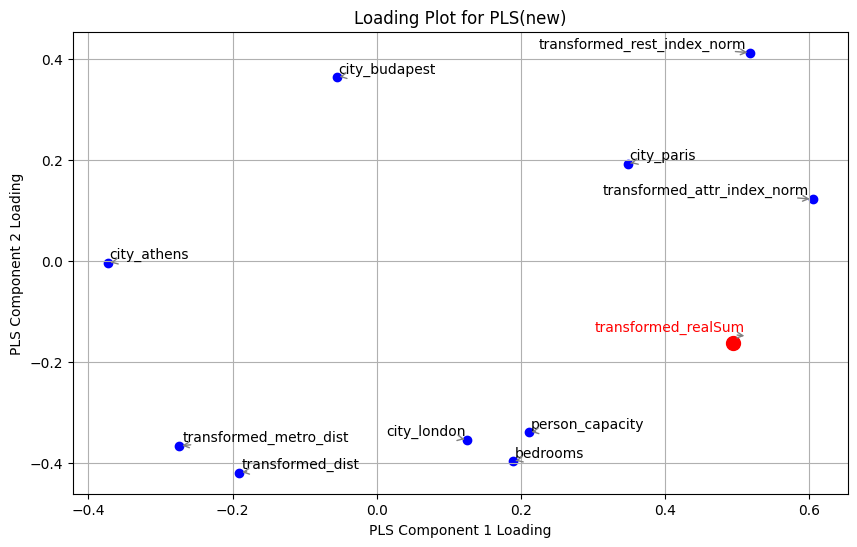

In [100]:
# Get the feature names from the original data
feature_names = X1.columns

# Get the loadings from the PLS-DA model
loadings = pls_reg.x_loadings_

# Get the y-loadings from the PLS-DA model
y_loadings = pls_reg.y_loadings_

# Create a scatter plot of the loadings
plt.figure(figsize=(10, 6))
scatter = plt.scatter(loadings[:, 0], loadings[:, 1], c='b', marker='o')

plt.xlabel('PLS Component 1 Loading')
plt.ylabel('PLS Component 2 Loading')

# Annotate the points with feature names
annotations = []
for i, txt in enumerate(feature_names):
    annotation = plt.annotate(txt, (loadings[i, 0], loadings[i, 1]), fontsize=10, ha='right')
    annotations.append(annotation)

# Plot the Churn variable as a separate red dot
transformed_realSum_dot = plt.scatter(y_loadings[0, 0], y_loadings[0, 1], c='r', marker='o', s=100)
transformed_realSum_annotation = plt.annotate('transformed_realSum', (y_loadings[0, 0], y_loadings[0, 1]), fontsize=10, ha='right', color='r',
                                xytext=(10, 5), textcoords='offset points')

# Combine all annotations for adjustment
all_annotations = annotations + [transformed_realSum_annotation]

# Use adjustText to automatically adjust label positions
adjust_text(all_annotations, arrowprops=dict(arrowstyle='->', color='gray'))

plt.title('Loading Plot for PLS(new)')
plt.grid(True)
plt.show()


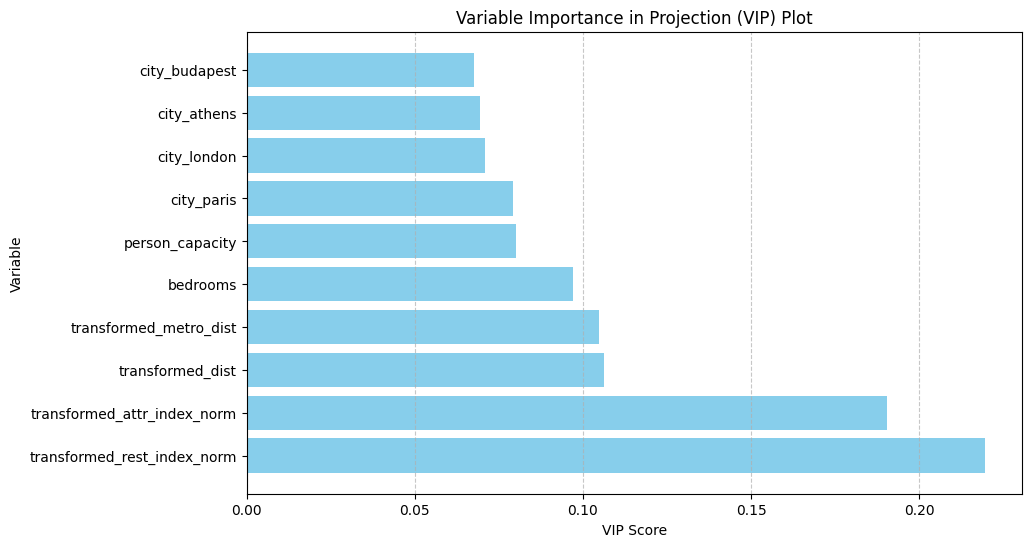

In [102]:
# Calculate VIP scores
n_components = 2  # Number of components used in PLS-DA
n_features = X1.shape[1]  # Number of features

# Initialize VIP scores
vip_scores = np.zeros(n_features)

# Calculate VIP scores for each component
for i in range(n_components):
    w = pls_reg.x_weights_[:, i]
    c = np.sum(w ** 2)
    vip_scores += (c * (pls_reg.x_loadings_[:, i] ** 2))

# Normalize VIP scores by dividing by the number of components
vip_scores /= n_components

# Create a DataFrame to store VIP scores and variable names
vip_df = pd.DataFrame({'Variable': X1.columns, 'VIP Score': vip_scores})

# Sort VIP scores in descending order
vip_df = vip_df.sort_values(by='VIP Score', ascending=False)

# Create the VIP plot
plt.figure(figsize=(10, 6))
plt.barh(vip_df['Variable'], vip_df['VIP Score'], color='skyblue')
plt.xlabel('VIP Score')
plt.ylabel('Variable')
plt.title('Variable Importance in Projection (VIP) Plot')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [105]:
# Create a LinearRegression model
reg = LinearRegression()

# Fit the model on the training data
reg.fit(X1, y1)

# Get the coefficients of the logistic regression model
coefficients = reg.coef_[0]

# Calculate the VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X1.columns
vif_data['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]


# Display the VIF values
print(vif_data)


                      Variable        VIF
0              person_capacity  10.027600
1                     bedrooms   6.633877
2             transformed_dist   2.596964
3       transformed_metro_dist   2.499200
4  transformed_attr_index_norm  23.637528
5  transformed_rest_index_norm  17.977262
6                  city_athens   1.303776
7                city_budapest   1.231293
8                  city_london   3.017351
9                   city_paris   1.702432


**Model Fitting**

In [129]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X1,y1 , test_size=0.2, random_state=42)


In [110]:
# building models

def model(method, x_train, y_train, x_test, y_test):
    # Scale the training and test data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Train the model on the training data
    method.fit(x_train, y_train)

    # Make predictions on training and test data
    train_predictions = method.predict(x_train)
    test_predictions = method.predict(x_test)

    # Calculate confusion matrix for test data
    test_c_matrix = confusion_matrix(y_test, test_predictions)

    # Calculate label percentages and create label strings with counts and percentages for test data
    test_percentages = (test_c_matrix / np.sum(test_c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
    test_labels = [[f"{test_c_matrix[i, j]} ({test_percentages[i, j]:.2f}%)" for j in range(test_c_matrix.shape[1])] for i in range(test_c_matrix.shape[0])]
    test_labels = np.asarray(test_labels)

    # Plot confusion matrix with labeled counts and percentages for test data
    sns.heatmap(test_c_matrix, annot=test_labels, fmt='', cmap='Blues')

    # Evaluate model performance and print results for training and test data
    print("Training ROC AUC: ", '{:.2%}'.format(roc_auc_score(y_train, train_predictions)))
    print("Training accuracy: ", '{:.2%}'.format(accuracy_score(y_train, train_predictions)))
    print(classification_report(y_train, train_predictions))

    print("Test ROC AUC: ", '{:.2%}'.format(roc_auc_score(y_test, test_predictions)))
    print("Test accuracy: ", '{:.2%}'.format(accuracy_score(y_test, test_predictions)))
    print(classification_report(y_test, test_predictions))

    # Plot feature importance values
    #importances = method.feature_importances_
    #feat_importances = pd.Series(importances, index=x_train.columns)
    #feat_importances.nlargest(20).plot(kind='barh')
    #plt.title('Feature Importance')

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# create a linearc regression model with ridge regularization
Linreg = LinearRegression()
Linreg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Linreg.predict(x_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.00
R-squared: 0.51


In [119]:
# Create a Ridge regression model
ridge_reg = Ridge(alpha=1.0)  # Adjust the alpha parameter for regularization strength

# Fit the model on the training data
ridge_reg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = ridge_reg.predict(x_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.00
R-squared: 0.51


In [116]:
# Create a Lasso regression model
lasso_reg = Lasso(alpha=1.0)  # Adjust the alpha parameter for regularization strength

# Fit the model on the training data
lasso_reg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lasso_reg.predict(x_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.01
R-squared: -0.00


In [117]:
# Create an Elastic Net regression model
elastic_net_reg = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Adjust the alpha and l1_ratio parameters

# Fit the model on the training data
elastic_net_reg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = elastic_net_reg.predict(x_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.01
R-squared: -0.00


In [128]:
from xgboost import XGBRegressor
# Create an XGBoost regressor
xgb_regressor = XGBRegressor()

# Fit the model on the training data
xgb_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(x_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
# Evaluate the performance
#accuracy = accuracy_score(y_test, y_pred)
#conf_matrix = confusion_matrix(y_test, y_pred)
#class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
#print(f'Accuracy: {accuracy:.2f}')
#print('Confusion Matrix:\n', conf_matrix)
#print('Classification Report:\n', class_report)

Mean Squared Error: 0.00
R-squared: 0.66


In [130]:
from sklearn.ensemble import GradientBoostingRegressor
# Create a Gradient Boosting regressor
gb_regressor = GradientBoostingRegressor()

# Fit the model on the training data
gb_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(x_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.00
R-squared: 0.57


In [132]:
from sklearn.neighbors import KNeighborsRegressor
# Create a KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model on the training data
knn_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(x_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.00
R-squared: 0.64


In [134]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Fit the model on the training data
rf_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(x_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.00
R-squared: 0.77


In [135]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
# Feature scaling is often important for SVMs
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create an SVR model
svr = SVR(kernel='linear')  # You can choose a different kernel based on your requirements

# Fit the model on the training data
svr.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(x_test_scaled)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.00
R-squared: 0.51


**Random forest gives the best accuracy. so lets get its importance plot**

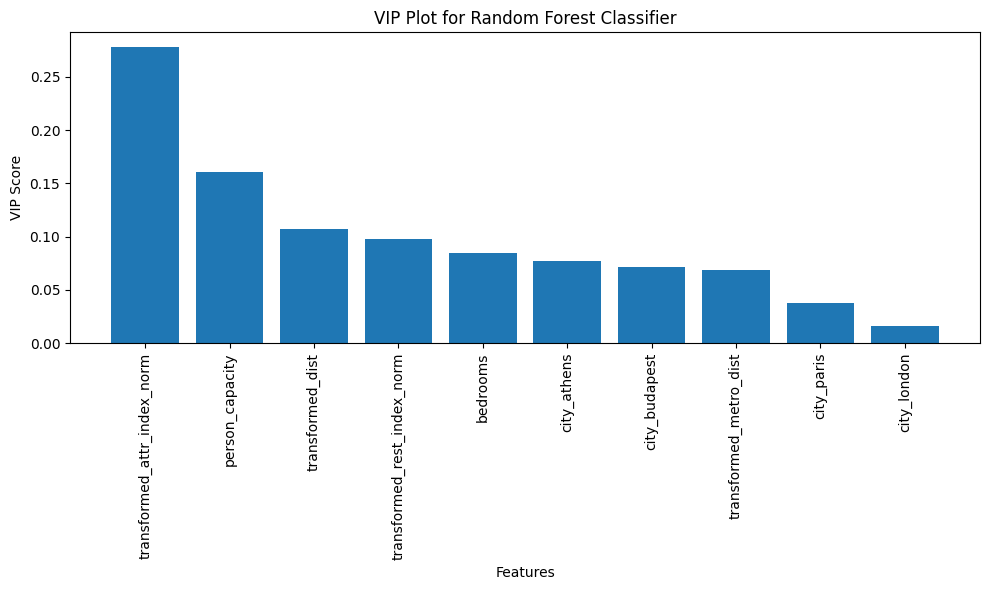

In [137]:
from sklearn.inspection import permutation_importance
# Calculate feature importances using permutation importance
perm_importance = permutation_importance(rf_regressor, x_test, y_test, n_repeats=30, random_state=42)

# Get the mean importance scores and normalize them
mean_importance = perm_importance.importances_mean
vip_scores = mean_importance / np.sum(mean_importance)

# Sort the VIP scores and feature names
sorted_indices = np.argsort(vip_scores)[::-1]
sorted_vip_scores = vip_scores[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the VIP scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_vip_scores)), sorted_vip_scores)
plt.xticks(range(len(sorted_vip_scores)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('VIP Score')
plt.title('VIP Plot for Random Forest Classifier')
plt.tight_layout()
plt.show()

**Modeling using most important variables**

In [ ]:
# Sort VIP scores in descending order
#vip_df = vip_df.sort_values(by='VIP Score', ascending=False)

# Get the top 6 most important variables
#top_6_variables = vip_df.head(6)
# Extract the top 6 variable names from the VIP DataFrame
#top_6_variable_names = top_6_variables['Variable'].tolist()

# Select the corresponding columns from the original dataset
#top_6_variables_df = df_encoded[top_6_variable_names]

top_6_variables_df = df_encoded[sorted_feature_names]


In [ ]:
y1 = df_encoded['Churn']
X1 = top_6_variables_df

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X1,y1 , test_size=0.2, random_state=42)


In [ ]:
# create a logistic regression model with ridge regularization
logreg = LogisticRegression(solver='liblinear', random_state=42)
model(logreg,x_train,y_train,x_test,y_test)

In [ ]:
# create a logistic regression model with ridge regularization
logridge = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
model(logridge,x_train,y_train,x_test,y_test)

In [ ]:
loglasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model(logridge,x_train,y_train,x_test,y_test)

In [ ]:
logEN = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)
model(logEN,x_train,y_train,x_test,y_test)

In [ ]:
xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
model(xgb,x_train,y_train,x_test,y_test)

In [ ]:
GB = GradientBoostingClassifier(random_state=42)
model(GB,x_train,y_train,x_test,y_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
model(knn,x_train,y_train,x_test,y_test)

In [ ]:
rf = RandomForestClassifier(random_state=42)
model(rf,x_train,y_train,x_test,y_test)

In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
model(rf,x_train,y_train,x_test,y_test)

In [ ]:
def grid_search_cv(model, param_grid, x_train, y_train, x_test, y_test, scoring='accuracy'):
    """
    Perform GridSearchCV for a given model using the specified parameter grid.

    Args:
        model: Machine learning model (e.g., RandomForestClassifier, XGBClassifier, etc.)
        param_grid: Dictionary of hyperparameters and their respective values to search over.
        x_train: Training features.
        y_train: Training labels.
        x_test: Test features.
        y_test: Test labels.
        scoring: Scoring metric for GridSearchCV (default is 'accuracy').

    Returns:
        best_model: Best fitted model with optimal hyperparameters.
    """
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5)

    # Fit GridSearchCV to the training data
    grid_search.fit(x_train, y_train)

    # Get the best hyperparameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Scale the test data using the same scaler used for training data
    scaler = StandardScaler()
    x_test_scaled = scaler.fit_transform(x_test)

    # Make predictions on training and test data using the best model
    train_predictions = best_model.predict(x_train)
    test_predictions = best_model.predict(x_test_scaled)

    # Calculate confusion matrix for test data
    test_c_matrix = confusion_matrix(y_test, test_predictions)

    # Calculate label percentages and create label strings with counts and percentages for test data
    test_percentages = (test_c_matrix / np.sum(test_c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
    test_labels = [[f"{test_c_matrix[i, j]} ({test_percentages[i, j]:.2f}%)" for j in range(test_c_matrix.shape[1])] for i in range(test_c_matrix.shape[0])]
    test_labels = np.asarray(test_labels)

    # Plot confusion matrix with labeled counts and percentages for test data
    sns.heatmap(test_c_matrix, annot=test_labels, fmt='', cmap='Blues')

    # Evaluate model performance and print results for training and test data
    print("Best Hyperparameters:", best_params)
    print("Training accuracy: ", '{:.2%}'.format(accuracy_score(y_train, train_predictions)))
    print(classification_report(y_train, train_predictions))

    print("Test accuracy: ", '{:.2%}'.format(accuracy_score(y_test, test_predictions)))
    print(classification_report(y_test, test_predictions))

    # Plot feature importance values if applicable
    # importances = best_model.feature_importances_
    # feat_importances = pd.Series(importances, index=x_train.columns)
    # feat_importances.nlargest(20).plot(kind='barh')
    # plt.title('Feature Importance')

    return best_model



In [ ]:
# Grid for Random Forest Classifier
rf_param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    # Add more Random Forest hyperparameters as needed
}

# Create and use Random Forest Classifier
rf = RandomForestClassifier()
best_rf_model = grid_search_cv(rf, rf_param_grid, x_train, y_train, x_test, y_test)

In [ ]:
# Example usage for XGBoost Classifier
from xgboost import XGBClassifier

xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 500, 1000],
    # Add more XGBoost hyperparameters as needed
}

xgb = XGBClassifier()
best_xgb_model = grid_search_cv(xgb, xgb_param_grid, x_train, y_train, x_test, y_test)


In [ ]:
# Grid for Gradient Boosting Classifier
gb_param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    # Add more Gradient Boosting hyperparameters as needed
}

# Create and use Gradient Boosting Classifier
gb = GradientBoostingClassifier()
best_gb_model = grid_search_cv(gb, gb_param_grid, x_train, y_train, x_test, y_test)


In [ ]:
# Grid for KNN Classifier
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    # Add more KNN hyperparameters as needed
}

# Create and use KNN Classifier
knn = KNeighborsClassifier()
best_knn_model = grid_search_cv(knn, knn_param_grid, x_train, y_train, x_test, y_test)


In [ ]:
# Grid for SVM Classifier
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    # Add more SVM hyperparameters as needed
}

# Create and use SVM Classifier
svm = SVC()
best_svm_model = grid_search_cv(svm, svm_param_grid, x_train, y_train, x_test, y_test)
